# Project: Decoding Molecules From Fingerprints.
## Group Members:
### Qi Chen, e-mail: gusqichr@student.gu.se
### Nils Dunlop, e-mail: gusdunlni@student.gu.se
### Francisco Alejandro Erazo Piza, e-mail: guserafr@student.gu.se
***

In [108]:
import os
import io
import base64
from typing import List, Tuple
from concurrent.futures import ThreadPoolExecutor, as_completed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors
from PIL import Image

from rdkit import Chem
from rdkit.Chem import AllChem, Draw, PandasTools
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from rdkit import DataStructs
from rdkit.DataStructs import TanimotoSimilarity

from joblib import Parallel, delayed
from sklearn.manifold import MDS, TSNE

# Pandas display settings
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

### Define directories
***

In [109]:
# Set user directory
USER_DIR = os.path.expanduser('~')

# Set the project root directory
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Define the input and output directories
INPUT_DIR = os.path.join(PROJECT_ROOT, 'data/bit_flipping_nn_review_2')

### Load Parecoxib, Celecoxib, Cimicoxib and Deracoxib, Anitrazafen Data
***

In [110]:
# Read 2 random flips
parecoxib_df_2 = pd.read_parquet(os.path.join(INPUT_DIR, 'parecoxib_df_2_random_flips.parquet'))
print(f"Parecoxib shape: {parecoxib_df_2.shape}")

celecoxib_df_2 = pd.read_parquet(os.path.join(INPUT_DIR, 'celecoxib_df_2_random_flips.parquet'))
print(f"Celecoxib shape: {celecoxib_df_2.shape}")

cimicoxib_df_2 = pd.read_parquet(os.path.join(INPUT_DIR, 'cimicoxib_df_2_random_flips.parquet'))
print(f"Cimicoxib shape: {cimicoxib_df_2.shape}")

deracoxib_df_2 = pd.read_parquet(os.path.join(INPUT_DIR, 'deracoxib_df_2_random_flips.parquet'))
print(f"Deracoxib shape: {deracoxib_df_2.shape}")

anitrazafen_df_2 = pd.read_parquet(os.path.join(INPUT_DIR, 'anitrazafen_df_2_random_flips.parquet'))
print(f"Anitrazafen shape: {anitrazafen_df_2.shape}")

Parecoxib shape: (1024, 9)
Celecoxib shape: (1024, 9)
Cimicoxib shape: (1024, 9)
Deracoxib shape: (1024, 9)
Anitrazafen shape: (1024, 9)


In [111]:
# Read 4 random flips
parecoxib_df_4 = pd.read_parquet(os.path.join(INPUT_DIR, 'parecoxib_df_4_random_flips.parquet'))
print(f"Parecoxib shape: {parecoxib_df_4.shape}")

celecoxib_df_4 = pd.read_parquet(os.path.join(INPUT_DIR, 'celecoxib_df_4_random_flips.parquet'))
print(f"Celecoxib shape: {celecoxib_df_4.shape}")

cimicoxib_df_4 = pd.read_parquet(os.path.join(INPUT_DIR, 'cimicoxib_df_4_random_flips.parquet'))
print(f"Cimicoxib shape: {cimicoxib_df_4.shape}")

deracoxib_df_4 = pd.read_parquet(os.path.join(INPUT_DIR, 'deracoxib_df_4_random_flips.parquet'))
print(f"Deracoxib shape: {deracoxib_df_4.shape}")

anitrazafen_df_4 = pd.read_parquet(os.path.join(INPUT_DIR, 'anitrazafen_df_4_random_flips.parquet'))
print(f"Anitrazafen shape: {anitrazafen_df_4.shape}")

Parecoxib shape: (512, 9)
Celecoxib shape: (512, 9)
Cimicoxib shape: (512, 9)
Deracoxib shape: (512, 9)
Anitrazafen shape: (512, 9)


In [112]:
# Read 8 random flips
parecoxib_df_8 = pd.read_parquet(os.path.join(INPUT_DIR, 'parecoxib_df_8_random_flips.parquet'))
print(f"Parecoxib shape: {parecoxib_df_8.shape}")

celecoxib_df_8 = pd.read_parquet(os.path.join(INPUT_DIR, 'celecoxib_df_8_random_flips.parquet'))
print(f"Celecoxib shape: {celecoxib_df_8.shape}")

cimicoxib_df_8 = pd.read_parquet(os.path.join(INPUT_DIR, 'cimicoxib_df_8_random_flips.parquet'))
print(f"Cimicoxib shape: {cimicoxib_df_8.shape}")

deracoxib_df_8 = pd.read_parquet(os.path.join(INPUT_DIR, 'deracoxib_df_8_random_flips.parquet'))
print(f"Deracoxib shape: {deracoxib_df_8.shape}")

anitrazafen_df_8 = pd.read_parquet(os.path.join(INPUT_DIR, 'anitrazafen_df_8_random_flips.parquet'))
print(f"Anitrazafen shape: {anitrazafen_df_8.shape}")

Parecoxib shape: (256, 9)
Celecoxib shape: (256, 9)
Cimicoxib shape: (256, 9)
Deracoxib shape: (256, 9)
Anitrazafen shape: (256, 9)


In [113]:
# Read 128 random flips
parecoxib_df_128 = pd.read_parquet(os.path.join(INPUT_DIR, 'parecoxib_df_128_random_flips.parquet'))
print(f"Parecoxib shape: {parecoxib_df_128.shape}")

celecoxib_df_128 = pd.read_parquet(os.path.join(INPUT_DIR, 'celecoxib_df_128_random_flips.parquet'))
print(f"Celecoxib shape: {celecoxib_df_128.shape}")

cimicoxib_df_128 = pd.read_parquet(os.path.join(INPUT_DIR, 'cimicoxib_df_128_random_flips.parquet'))
print(f"Cimicoxib shape: {cimicoxib_df_128.shape}")

deracoxib_df_128 = pd.read_parquet(os.path.join(INPUT_DIR, 'deracoxib_df_128_random_flips.parquet'))
print(f"Deracoxib shape: {deracoxib_df_128.shape}")

anitrazafen_df_128 = pd.read_parquet(os.path.join(INPUT_DIR, 'anitrazafen_df_128_random_flips.parquet'))
print(f"Anitrazafen shape: {anitrazafen_df_128.shape}")

Parecoxib shape: (16, 9)
Celecoxib shape: (16, 9)
Cimicoxib shape: (16, 9)
Deracoxib shape: (16, 9)
Anitrazafen shape: (16, 9)


In [114]:
# Read 1024 random flips
parecoxib_df_1024 = pd.read_parquet(os.path.join(INPUT_DIR, 'parecoxib_df_1024_random_flips.parquet'))
print(f"Parecoxib shape: {parecoxib_df_1024.shape}")

celecoxib_df_1024 = pd.read_parquet(os.path.join(INPUT_DIR, 'celecoxib_df_1024_random_flips.parquet'))
print(f"Celecoxib shape: {celecoxib_df_1024.shape}")

cimicoxib_df_1024 = pd.read_parquet(os.path.join(INPUT_DIR, 'cimicoxib_df_1024_random_flips.parquet'))
print(f"Cimicoxib shape: {cimicoxib_df_1024.shape}")

deracoxib_df_1024 = pd.read_parquet(os.path.join(INPUT_DIR, 'deracoxib_df_1024_random_flips.parquet'))
print(f"Deracoxib shape: {deracoxib_df_1024.shape}")

anitrazafen_df_1024 = pd.read_parquet(os.path.join(INPUT_DIR, 'anitrazafen_df_1024_random_flips.parquet'))
print(f"Anitrazafen shape: {anitrazafen_df_1024.shape}")

Parecoxib shape: (2, 9)
Celecoxib shape: (2, 9)
Cimicoxib shape: (2, 9)
Deracoxib shape: (2, 9)
Anitrazafen shape: (2, 9)


### Validate generated SMILES
***

In [115]:
# Function to convert SMILES to molecule and check validity
def smiles_to_mol(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None, mol

In [116]:
# Validate generated SMILES
parecoxib_df_2['Valid_SMILES'], parecoxib_df_2['Molecule'] = zip(*parecoxib_df_2['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
celecoxib_df_2['Valid_SMILES'], celecoxib_df_2['Molecule'] = zip(*celecoxib_df_2['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
cimicoxib_df_2['Valid_SMILES'], cimicoxib_df_2['Molecule'] = zip(*cimicoxib_df_2['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
deracoxib_df_2['Valid_SMILES'], deracoxib_df_2['Molecule'] = zip(*deracoxib_df_2['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
anitrazafen_df_2['Valid_SMILES'], anitrazafen_df_2['Molecule'] = zip(*anitrazafen_df_2['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))

parecoxib_df_4['Valid_SMILES'], parecoxib_df_4['Molecule'] = zip(*parecoxib_df_4['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
celecoxib_df_4['Valid_SMILES'], celecoxib_df_4['Molecule'] = zip(*celecoxib_df_4['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
cimicoxib_df_4['Valid_SMILES'], cimicoxib_df_4['Molecule'] = zip(*cimicoxib_df_4['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
deracoxib_df_4['Valid_SMILES'], deracoxib_df_4['Molecule'] = zip(*deracoxib_df_4['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
anitrazafen_df_4['Valid_SMILES'], anitrazafen_df_4['Molecule'] = zip(*anitrazafen_df_4['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))

parecoxib_df_8['Valid_SMILES'], parecoxib_df_8['Molecule'] = zip(*parecoxib_df_8['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
celecoxib_df_8['Valid_SMILES'], celecoxib_df_8['Molecule'] = zip(*celecoxib_df_8['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
cimicoxib_df_8['Valid_SMILES'], cimicoxib_df_8['Molecule'] = zip(*cimicoxib_df_8['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
deracoxib_df_8['Valid_SMILES'], deracoxib_df_8['Molecule'] = zip(*deracoxib_df_8['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
anitrazafen_df_8['Valid_SMILES'], anitrazafen_df_8['Molecule'] = zip(*anitrazafen_df_8['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))

parecoxib_df_128['Valid_SMILES'], parecoxib_df_128['Molecule'] = zip(*parecoxib_df_128['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
celecoxib_df_128['Valid_SMILES'], celecoxib_df_128['Molecule'] = zip(*celecoxib_df_128['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
cimicoxib_df_128['Valid_SMILES'], cimicoxib_df_128['Molecule'] = zip(*cimicoxib_df_128['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
deracoxib_df_128['Valid_SMILES'], deracoxib_df_128['Molecule'] = zip(*deracoxib_df_128['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
anitrazafen_df_128['Valid_SMILES'], anitrazafen_df_128['Molecule'] = zip(*anitrazafen_df_128['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))

parecoxib_df_1024['Valid_SMILES'], parecoxib_df_1024['Molecule'] = zip(*parecoxib_df_1024['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
celecoxib_df_1024['Valid_SMILES'], celecoxib_df_1024['Molecule'] = zip(*celecoxib_df_1024['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
cimicoxib_df_1024['Valid_SMILES'], cimicoxib_df_1024['Molecule'] = zip(*cimicoxib_df_1024['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
deracoxib_df_1024['Valid_SMILES'], deracoxib_df_1024['Molecule'] = zip(*deracoxib_df_1024['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
anitrazafen_df_1024['Valid_SMILES'], anitrazafen_df_1024['Molecule'] = zip(*anitrazafen_df_1024['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))


[20:16:11] SMILES Parse Error: syntax error while parsing: Invalid
[20:16:11] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:16:11] SMILES Parse Error: syntax error while parsing: Invalid
[20:16:11] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:16:11] SMILES Parse Error: syntax error while parsing: Invalid
[20:16:11] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:16:11] SMILES Parse Error: syntax error while parsing: Invalid
[20:16:11] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:16:11] SMILES Parse Error: syntax error while parsing: Invalid
[20:16:11] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:16:11] SMILES Parse Error: syntax error while parsing: Invalid
[20:16:11] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:16:11] SMILES Parse Error: syntax error while parsing: Invalid
[20:16:11] SMILES Parse Err

In [117]:
def calculate_valid_smiles_percentage(df_dict):
    results = []
    
    for compound, df in df_dict.items():
        valid_smiles = df['Valid_SMILES'].sum()
        percentage = df['Valid_SMILES'].mean() * 100
        results.append({
            'Compound': compound,
            'Valid_SMILES': valid_smiles,
            'Percentage': percentage
        })
    
    return pd.DataFrame(results)

In [118]:
df_dict_2 = {
    'Parecoxib': parecoxib_df_2,
    'Celecoxib': celecoxib_df_2,
    'Cimicoxib': cimicoxib_df_2,
    'Deracoxib': deracoxib_df_2,
    'Anitrazafen': anitrazafen_df_2
}

valid_smiles_percentage_2 = calculate_valid_smiles_percentage(df_dict_2)
valid_smiles_percentage_2


,Compound,Valid_SMILES,Percentage
0,Parecoxib,1024,100.000000
1,Celecoxib,1024,100.000000
2,Cimicoxib,1024,100.000000
3,Deracoxib,1023,99.902344
4,Anitrazafen,1024,100.000000


In [119]:
df_dict_4 = {
    'Parecoxib': parecoxib_df_4,
    'Celecoxib': celecoxib_df_4,
    'Cimicoxib': cimicoxib_df_4,
    'Deracoxib': deracoxib_df_4,
    'Anitrazafen': anitrazafen_df_4
}
valid_smiles_percentage_4 = calculate_valid_smiles_percentage(df_dict_4)
valid_smiles_percentage_4


,Compound,Valid_SMILES,Percentage
0,Parecoxib,512,100.000000
1,Celecoxib,512,100.000000
2,Cimicoxib,512,100.000000
3,Deracoxib,511,99.804688
4,Anitrazafen,508,99.218750


In [120]:
df_dict_8 = {
    'Parecoxib': parecoxib_df_8,
    'Celecoxib': celecoxib_df_8,
    'Cimicoxib': cimicoxib_df_8,
    'Deracoxib': deracoxib_df_8,
    'Anitrazafen': anitrazafen_df_8
}
valid_smiles_percentage_8 = calculate_valid_smiles_percentage(df_dict_8)
valid_smiles_percentage_8

,Compound,Valid_SMILES,Percentage
0,Parecoxib,255,99.609375
1,Celecoxib,256,100.000000
2,Cimicoxib,256,100.000000
3,Deracoxib,256,100.000000
4,Anitrazafen,206,80.468750


In [121]:
df_dict_128 = {
    'Parecoxib': parecoxib_df_128,
    'Celecoxib': celecoxib_df_128,
    'Cimicoxib': cimicoxib_df_128,
    'Deracoxib': deracoxib_df_128,
    'Anitrazafen': anitrazafen_df_128
}
valid_smiles_percentage_128 = calculate_valid_smiles_percentage(df_dict_128)
valid_smiles_percentage_128

,Compound,Valid_SMILES,Percentage
0,Parecoxib,12,75.00
1,Celecoxib,8,50.00
2,Cimicoxib,11,68.75
3,Deracoxib,13,81.25
4,Anitrazafen,7,43.75


In [122]:
df_dict_1024 = {
    'Parecoxib': parecoxib_df_1024,
    'Celecoxib': celecoxib_df_1024,
    'Cimicoxib': cimicoxib_df_1024,
    'Deracoxib': deracoxib_df_1024,
    'Anitrazafen': anitrazafen_df_1024
}
valid_smiles_percentage_1024 = calculate_valid_smiles_percentage(df_dict_1024)
valid_smiles_percentage_1024

,Compound,Valid_SMILES,Percentage
0,Parecoxib,0,0.0
1,Celecoxib,0,0.0
2,Cimicoxib,1,50.0
3,Deracoxib,0,0.0
4,Anitrazafen,0,0.0


### Tanimoto similarity
***

In [123]:
# Define a function to calculate Tanimoto similarity with debugging
def calculate_tanimoto_safe(smiles1, smiles2):
    try:
        # Skip if either SMILES is marked as 'Invalid SMILES string'
        if smiles1 == 'Invalid SMILES string' or smiles2 == 'Invalid SMILES string':
            return None
        
        # Convert SMILES to molecule objects
        mol1 = Chem.MolFromSmiles(smiles1)
        mol2 = Chem.MolFromSmiles(smiles2)
        
        # Debugging information
        if mol1 is None:
            print(f"Failed to parse SMILES1: {smiles1}")
        if mol2 is None:
            print(f"Failed to parse SMILES2: {smiles2}")
        
        # Skip if either molecule failed to parse
        if mol1 is None or mol2 is None:
            return None
        
        # Generate fingerprints for Tanimoto calculation
        morgan_gen = GetMorganGenerator(radius=2, fpSize=2048)
        fp1 = morgan_gen.GetFingerprint(mol1)
        fp2 = morgan_gen.GetFingerprint(mol2)
        
        # Debugging information
        if fp1 is None or fp2 is None:
            print(f"Failed to generate fingerprints for SMILES1: {smiles1}, SMILES2: {smiles2}")
        
        # Calculate Tanimoto similarity
        return TanimotoSimilarity(fp1, fp2)
    
    except Exception as e:
        # Print the exception to help diagnose
        print(f"Error calculating Tanimoto similarity: {e}")
        return None

In [124]:
parecoxib_df_2['Tanimoto'] = parecoxib_df_2.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
celecoxib_df_2['Tanimoto'] = celecoxib_df_2.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
cimicoxib_df_2['Tanimoto'] = cimicoxib_df_2.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
deracoxib_df_2['Tanimoto'] = deracoxib_df_2.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
anitrazafen_df_2['Tanimoto'] = anitrazafen_df_2.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)

parecoxib_df_4['Tanimoto'] = parecoxib_df_4.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
celecoxib_df_4['Tanimoto'] = celecoxib_df_4.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
cimicoxib_df_4['Tanimoto'] = cimicoxib_df_4.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
deracoxib_df_4['Tanimoto'] = deracoxib_df_4.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
anitrazafen_df_4['Tanimoto'] = anitrazafen_df_4.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)

parecoxib_df_8['Tanimoto'] = parecoxib_df_8.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
celecoxib_df_8['Tanimoto'] = celecoxib_df_8.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
cimicoxib_df_8['Tanimoto'] = cimicoxib_df_8.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
deracoxib_df_8['Tanimoto'] = deracoxib_df_8.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
anitrazafen_df_8['Tanimoto'] = anitrazafen_df_8.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)

parecoxib_df_128['Tanimoto'] = parecoxib_df_128.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
celecoxib_df_128['Tanimoto'] = celecoxib_df_128.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
cimicoxib_df_128['Tanimoto'] = cimicoxib_df_128.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
deracoxib_df_128['Tanimoto'] = deracoxib_df_128.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
anitrazafen_df_128['Tanimoto'] = anitrazafen_df_128.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)

parecoxib_df_1024['Tanimoto'] = parecoxib_df_1024.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
celecoxib_df_1024['Tanimoto'] = celecoxib_df_1024.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
cimicoxib_df_1024['Tanimoto'] = cimicoxib_df_1024.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
deracoxib_df_1024['Tanimoto'] = deracoxib_df_1024.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
anitrazafen_df_1024['Tanimoto'] = anitrazafen_df_1024.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)

In [125]:
average_similarity_parecoxib_2 = parecoxib_df_2['Tanimoto'].mean()
average_similarity_celecoxib_2 = celecoxib_df_2['Tanimoto'].mean()
average_similarity_cimicoxib_2 = cimicoxib_df_2['Tanimoto'].mean()
average_similarity_deracoxib_2 = deracoxib_df_2['Tanimoto'].mean()
average_similarity_anitrazafen_2 = anitrazafen_df_2['Tanimoto'].mean()
print('*** 2 random flips ***')
print(f"Average Tanimoto Similarity for 2 random flips Parecoxib: {average_similarity_parecoxib_2}")
print(f"Average Tanimoto Similarity for 2 random flips Celecoxib: {average_similarity_celecoxib_2}")
print(f"Average Tanimoto Similarity for 2 random flips Cimicoxib: {average_similarity_cimicoxib_2}")
print(f"Average Tanimoto Similarity for 2 random flips Deracoxib: {average_similarity_deracoxib_2}")
print(f"Average Tanimoto Similarity for 2 random flips Anitrazafen: {average_similarity_anitrazafen_2}")

average_similarity_parecoxib_4 = parecoxib_df_4['Tanimoto'].mean()
average_similarity_celecoxib_4 = celecoxib_df_4['Tanimoto'].mean()
average_similarity_cimicoxib_4 = cimicoxib_df_4['Tanimoto'].mean()
average_similarity_deracoxib_4 = deracoxib_df_4['Tanimoto'].mean()
average_similarity_anitrazafen_4 = anitrazafen_df_4['Tanimoto'].mean()
print('*** 4 random flips ***')
print(f"Average Tanimoto Similarity for 4 random flips Parecoxib: {average_similarity_parecoxib_4}")
print(f"Average Tanimoto Similarity for 4 random flips Celecoxib: {average_similarity_celecoxib_4}")
print(f"Average Tanimoto Similarity for 4 random flips Cimicoxib: {average_similarity_cimicoxib_4}")
print(f"Average Tanimoto Similarity for 4 random flips Deracoxib: {average_similarity_deracoxib_4}")
print(f"Average Tanimoto Similarity for 4 random flips Anitrazafen: {average_similarity_anitrazafen_4}")

average_similarity_parecoxib_8 = parecoxib_df_8['Tanimoto'].mean()
average_similarity_celecoxib_8 = celecoxib_df_8['Tanimoto'].mean()
average_similarity_cimicoxib_8 = cimicoxib_df_8['Tanimoto'].mean()
average_similarity_deracoxib_8 = deracoxib_df_8['Tanimoto'].mean()
average_similarity_anitrazafen_8 = anitrazafen_df_8['Tanimoto'].mean()
print('*** 8 random flips ***')
print(f"Average Tanimoto Similarity for 8 random flips Parecoxib: {average_similarity_parecoxib_8}")
print(f"Average Tanimoto Similarity for 8 random flips Celecoxib: {average_similarity_celecoxib_8}")
print(f"Average Tanimoto Similarity for 8 random flips Cimicoxib: {average_similarity_cimicoxib_8}")
print(f"Average Tanimoto Similarity for 8 random flips Deracoxib: {average_similarity_deracoxib_8}")
print(f"Average Tanimoto Similarity for 8 random flips Anitrazafen: {average_similarity_anitrazafen_8}")


average_similarity_parecoxib_128 = parecoxib_df_128['Tanimoto'].mean()
average_similarity_celecoxib_128 = celecoxib_df_128['Tanimoto'].mean()
average_similarity_cimicoxib_128 = cimicoxib_df_128['Tanimoto'].mean()
average_similarity_deracoxib_128 = deracoxib_df_128['Tanimoto'].mean()
average_similarity_anitrazafen_128 = anitrazafen_df_128['Tanimoto'].mean()
print('*** 128 random flips ***')
print(f"Average Tanimoto Similarity for 128 random flips Parecoxib: {average_similarity_parecoxib_128}")
print(f"Average Tanimoto Similarity for 128 random flips Celecoxib: {average_similarity_celecoxib_128}")
print(f"Average Tanimoto Similarity for 128 random flips Cimicoxib: {average_similarity_cimicoxib_128}")
print(f"Average Tanimoto Similarity for 128 random flips Deracoxib: {average_similarity_deracoxib_128}")
print(f"Average Tanimoto Similarity for 128 random flips Anitrazafen: {average_similarity_anitrazafen_128}")

average_similarity_parecoxib_1024 = parecoxib_df_1024['Tanimoto'].mean()
average_similarity_celecoxib_1024 = celecoxib_df_1024['Tanimoto'].mean()
average_similarity_cimicoxib_1024 = cimicoxib_df_1024['Tanimoto'].mean()
average_similarity_deracoxib_1024 = deracoxib_df_1024['Tanimoto'].mean()
average_similarity_anitrazafen_1024 = anitrazafen_df_1024['Tanimoto'].mean()
print('*** 1024 random flips ***')
print(f"Average Tanimoto Similarity for 1024 random flips Parecoxib: {average_similarity_parecoxib_1024}")
print(f"Average Tanimoto Similarity for 1024 random flips Celecoxib: {average_similarity_celecoxib_1024}")
print(f"Average Tanimoto Similarity for 1024 random flips Cimicoxib: {average_similarity_cimicoxib_1024}")
print(f"Average Tanimoto Similarity for 1024 random flips Deracoxib: {average_similarity_deracoxib_1024}")
print(f"Average Tanimoto Similarity for 1024 random flips Anitrazafen: {average_similarity_anitrazafen_1024}")


*** 2 random flips ***
Average Tanimoto Similarity for 2 random flips Parecoxib: 0.9991828502234227
Average Tanimoto Similarity for 2 random flips Celecoxib: 0.9997542353797118
Average Tanimoto Similarity for 2 random flips Cimicoxib: 0.9997487745098039
Average Tanimoto Similarity for 2 random flips Deracoxib: 0.9999233319916433
Average Tanimoto Similarity for 2 random flips Anitrazafen: 0.9918509906735992
*** 4 random flips ***
Average Tanimoto Similarity for 4 random flips Parecoxib: 0.9972457789342063
Average Tanimoto Similarity for 4 random flips Celecoxib: 0.9987587864159891
Average Tanimoto Similarity for 4 random flips Cimicoxib: 0.9991850490196078
Average Tanimoto Similarity for 4 random flips Deracoxib: 0.9986325656463859
Average Tanimoto Similarity for 4 random flips Anitrazafen: 0.7893804018588264
*** 8 random flips ***
Average Tanimoto Similarity for 8 random flips Parecoxib: 0.8873106162461775
Average Tanimoto Similarity for 8 random flips Celecoxib: 0.8685064206374669
Ave

In [126]:
tanimoto_matches_parecoxib_2 = (parecoxib_df_2['Tanimoto'] == 1.0).sum()
tanimoto_matches_celecoxib_2 = (celecoxib_df_2['Tanimoto'] == 1.0).sum()
tanimoto_matches_cimicoxib_2 = (cimicoxib_df_2['Tanimoto'] == 1.0).sum()
tanimoto_matches_deracoxib_2 = (deracoxib_df_2['Tanimoto'] == 1.0).sum()
tanimoto_matches_anitrazafen_2 = (anitrazafen_df_2['Tanimoto'] == 1.0).sum()
print(f"Tanimoto Accuracy for 2 random flips Parecoxib: {tanimoto_matches_parecoxib_2 / len(parecoxib_df_2):.2%}")
print(f"Tanimoto Accuracy for 2 random flips Celecoxib: {tanimoto_matches_celecoxib_2 / len(celecoxib_df_2):.2%}")
print(f"Tanimoto Accuracy for 2 random flips Cimicoxib: {tanimoto_matches_cimicoxib_2 / len(cimicoxib_df_2):.2%}")
print(f"Tanimoto Accuracy for 2 random flips Deracoxib: {tanimoto_matches_deracoxib_2 / len(deracoxib_df_2):.2%}")
print(f"Tanimoto Accuracy for 2 random flips Anitrazafen: {tanimoto_matches_anitrazafen_2 / len(anitrazafen_df_2):.2%}")
print('')

tanimoto_matches_parecoxib_4 = (parecoxib_df_4['Tanimoto'] == 1.0).sum()
tanimoto_matches_celecoxib_4 = (celecoxib_df_4['Tanimoto'] == 1.0).sum()
tanimoto_matches_cimicoxib_4 = (cimicoxib_df_4['Tanimoto'] == 1.0).sum()
tanimoto_matches_deracoxib_4 = (deracoxib_df_4['Tanimoto'] == 1.0).sum()
tanimoto_matches_anitrazafen_4 = (anitrazafen_df_4['Tanimoto'] == 1.0).sum()
print(f"Tanimoto Accuracy for 4 random flips Parecoxib: {tanimoto_matches_parecoxib_4 / len(parecoxib_df_4):.2%}")
print(f"Tanimoto Accuracy for 4 random flips Celecoxib: {tanimoto_matches_celecoxib_4 / len(celecoxib_df_4):.2%}")
print(f"Tanimoto Accuracy for 4 random flips Cimicoxib: {tanimoto_matches_cimicoxib_4 / len(cimicoxib_df_4):.2%}")
print(f"Tanimoto Accuracy for 4 random flips Deracoxib: {tanimoto_matches_deracoxib_4 / len(deracoxib_df_4):.2%}")
print(f"Tanimoto Accuracy for 4 random flips Anitrazafen: {tanimoto_matches_anitrazafen_4 / len(anitrazafen_df_4):.2%}")
print('')

tanimoto_matches_parecoxib_8 = (parecoxib_df_8['Tanimoto'] == 1.0).sum()
tanimoto_matches_celecoxib_8 = (celecoxib_df_8['Tanimoto'] == 1.0).sum()
tanimoto_matches_cimicoxib_8 = (cimicoxib_df_8['Tanimoto'] == 1.0).sum()
tanimoto_matches_deracoxib_8 = (deracoxib_df_8['Tanimoto'] == 1.0).sum()
tanimoto_matches_anitrazafen_8 = (anitrazafen_df_8['Tanimoto'] == 1.0).sum()
print(f"Tanimoto Accuracy for 8 random flips Parecoxib: {tanimoto_matches_parecoxib_8 / len(parecoxib_df_8):.2%}")
print(f"Tanimoto Accuracy for 8 random flips Celecoxib: {tanimoto_matches_celecoxib_8 / len(celecoxib_df_8):.2%}")
print(f"Tanimoto Accuracy for 8 random flips Cimicoxib: {tanimoto_matches_cimicoxib_8 / len(cimicoxib_df_8):.2%}")
print(f"Tanimoto Accuracy for 8 random flips Deracoxib: {tanimoto_matches_deracoxib_8 / len(deracoxib_df_8):.2%}")
print(f"Tanimoto Accuracy for 8 random flips Anitrazafen: {tanimoto_matches_anitrazafen_8 / len(anitrazafen_df_8):.2%}")


tanimoto_matches_parecoxib_128 = (parecoxib_df_128['Tanimoto'] == 1.0).sum()
tanimoto_matches_celecoxib_128 = (celecoxib_df_128['Tanimoto'] == 1.0).sum()
tanimoto_matches_cimicoxib_128 = (cimicoxib_df_128['Tanimoto'] == 1.0).sum()
tanimoto_matches_deracoxib_128 = (deracoxib_df_128['Tanimoto'] == 1.0).sum()
tanimoto_matches_anitrazafen_128 = (anitrazafen_df_128['Tanimoto'] == 1.0).sum()
print(f"Tanimoto Accuracy for 128 random flips Parecoxib: {tanimoto_matches_parecoxib_128 / len(parecoxib_df_128):.2%}")
print(f"Tanimoto Accuracy for 128 random flips Celecoxib: {tanimoto_matches_celecoxib_128 / len(celecoxib_df_128):.2%}")
print(f"Tanimoto Accuracy for 128 random flips Cimicoxib: {tanimoto_matches_cimicoxib_128 / len(cimicoxib_df_128):.2%}")
print(f"Tanimoto Accuracy for 128 random flips Deracoxib: {tanimoto_matches_deracoxib_128 / len(deracoxib_df_128):.2%}")
print(f"Tanimoto Accuracy for 128 random flips Anitrazafen: {tanimoto_matches_anitrazafen_128 / len(anitrazafen_df_128):.2%}")

tanimoto_matches_parecoxib_1024 = (parecoxib_df_1024['Tanimoto'] == 1.0).sum()
tanimoto_matches_celecoxib_1024 = (celecoxib_df_1024['Tanimoto'] == 1.0).sum()
tanimoto_matches_cimicoxib_1024 = (cimicoxib_df_1024['Tanimoto'] == 1.0).sum()
tanimoto_matches_deracoxib_1024 = (deracoxib_df_1024['Tanimoto'] == 1.0).sum()
tanimoto_matches_anitrazafen_1024 = (anitrazafen_df_1024['Tanimoto'] == 1.0).sum()
print(f"Tanimoto Accuracy for 1024 random flips Parecoxib: {tanimoto_matches_parecoxib_1024 / len(parecoxib_df_1024):.2%}")
print(f"Tanimoto Accuracy for 1024 random flips Celecoxib: {tanimoto_matches_celecoxib_1024 / len(celecoxib_df_1024):.2%}")
print(f"Tanimoto Accuracy for 1024 random flips Cimicoxib: {tanimoto_matches_cimicoxib_1024 / len(cimicoxib_df_1024):.2%}")
print(f"Tanimoto Accuracy for 1024 random flips Deracoxib: {tanimoto_matches_deracoxib_1024 / len(deracoxib_df_1024):.2%}")
print(f"Tanimoto Accuracy for 1024 random flips Anitrazafen: {tanimoto_matches_anitrazafen_1024 / len(anitrazafen_df_1024):.2%}")


Tanimoto Accuracy for 2 random flips Parecoxib: 99.32%
Tanimoto Accuracy for 2 random flips Celecoxib: 99.80%
Tanimoto Accuracy for 2 random flips Cimicoxib: 99.80%
Tanimoto Accuracy for 2 random flips Deracoxib: 99.80%
Tanimoto Accuracy for 2 random flips Anitrazafen: 97.56%

Tanimoto Accuracy for 4 random flips Parecoxib: 97.85%
Tanimoto Accuracy for 4 random flips Celecoxib: 99.22%
Tanimoto Accuracy for 4 random flips Cimicoxib: 99.41%
Tanimoto Accuracy for 4 random flips Deracoxib: 99.02%
Tanimoto Accuracy for 4 random flips Anitrazafen: 18.75%

Tanimoto Accuracy for 8 random flips Parecoxib: 9.77%
Tanimoto Accuracy for 8 random flips Celecoxib: 22.66%
Tanimoto Accuracy for 8 random flips Cimicoxib: 92.19%
Tanimoto Accuracy for 8 random flips Deracoxib: 76.17%
Tanimoto Accuracy for 8 random flips Anitrazafen: 0.00%
Tanimoto Accuracy for 128 random flips Parecoxib: 0.00%
Tanimoto Accuracy for 128 random flips Celecoxib: 0.00%
Tanimoto Accuracy for 128 random flips Cimicoxib: 0.00%
T

In [127]:
def plot_similarity_distribution(df, molecule_name, n_flips):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Tanimoto'], bins=20, kde=True)
    plt.title(f'Similarity Distribution of Generated Molecules\n{molecule_name} ({n_flips} flips at a time)')
    plt.xlabel('Tanimoto Similarity')
    plt.ylabel('Count')
    plt.show()

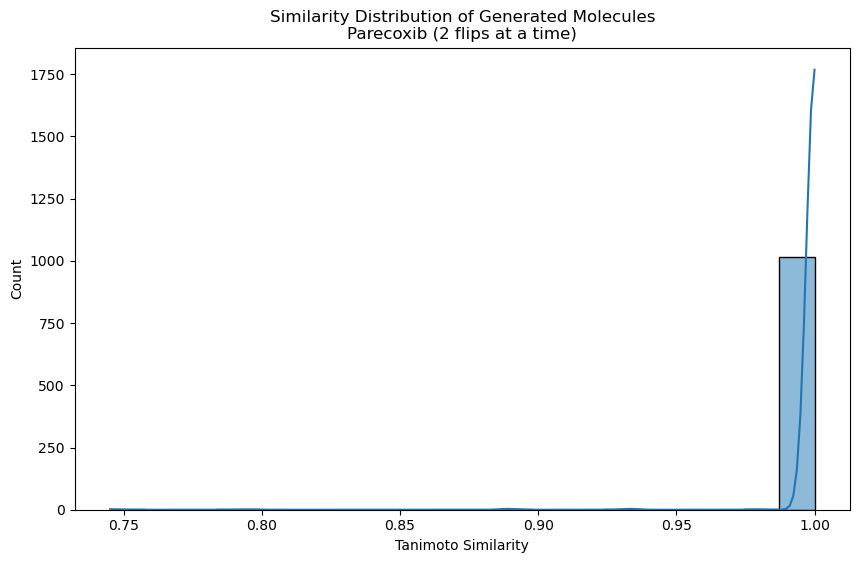

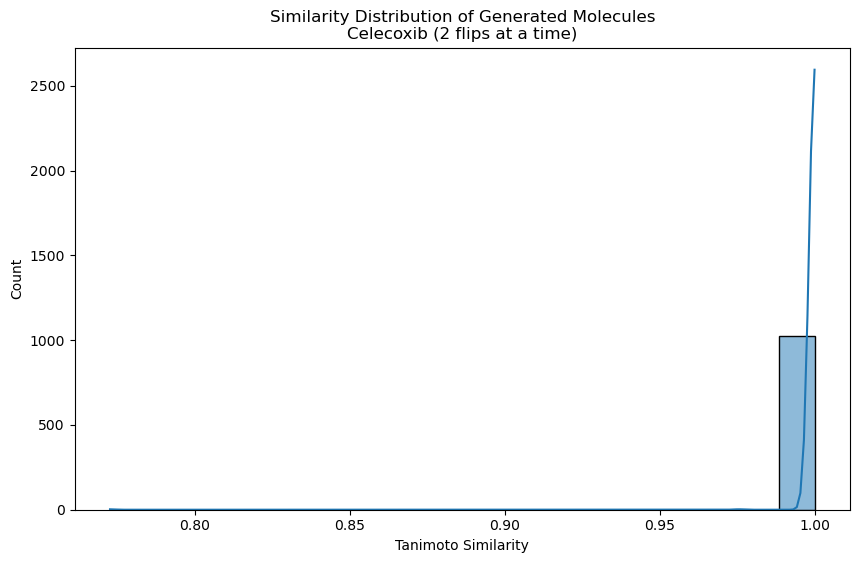

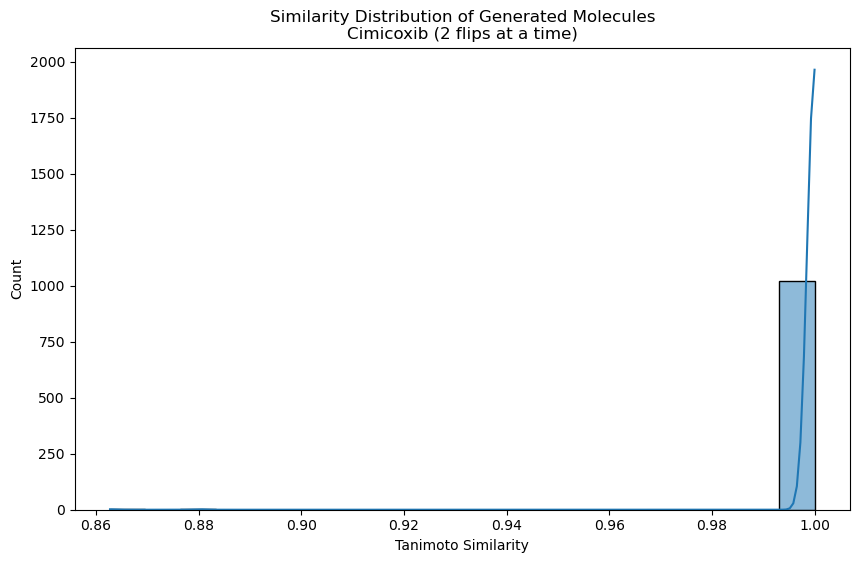

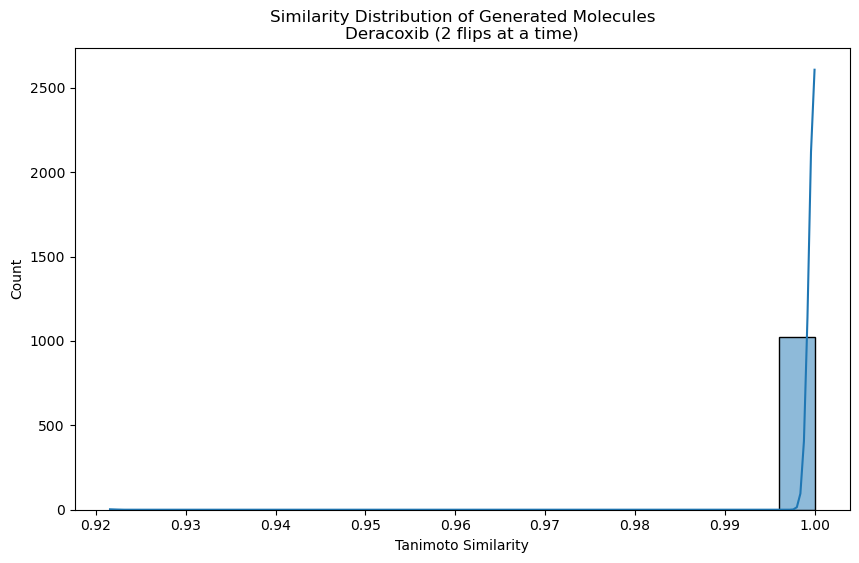

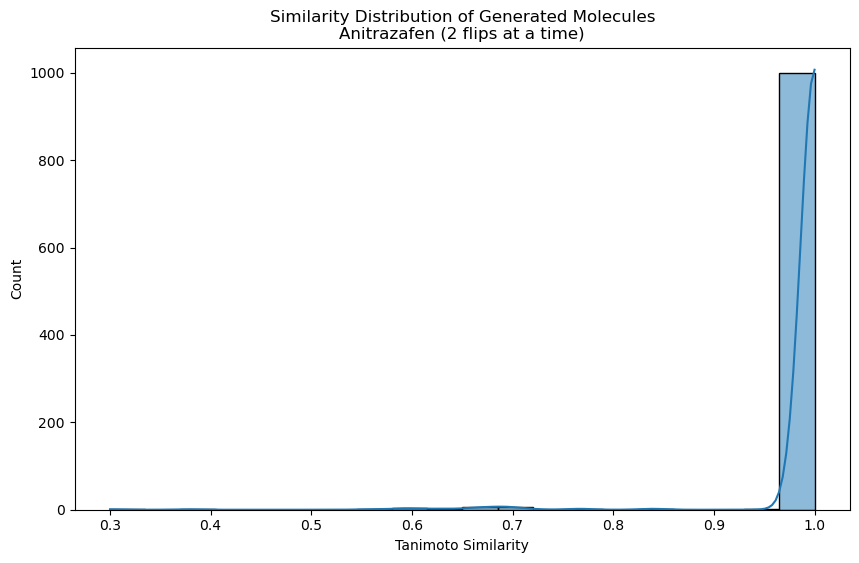

In [128]:
plot_similarity_distribution(parecoxib_df_2, 'Parecoxib', 2)
plot_similarity_distribution(celecoxib_df_2, 'Celecoxib', 2)
plot_similarity_distribution(cimicoxib_df_2, 'Cimicoxib', 2)
plot_similarity_distribution(deracoxib_df_2, 'Deracoxib', 2)
plot_similarity_distribution(anitrazafen_df_2, 'Anitrazafen', 2)

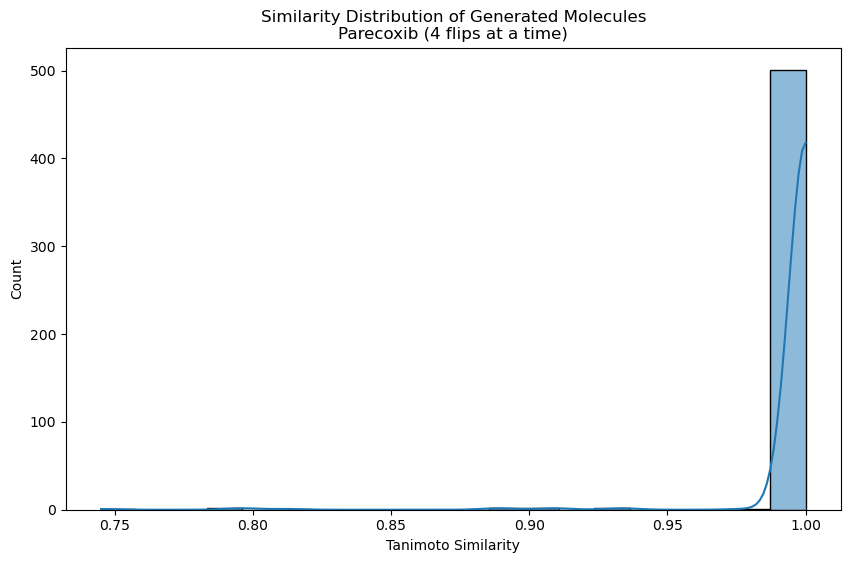

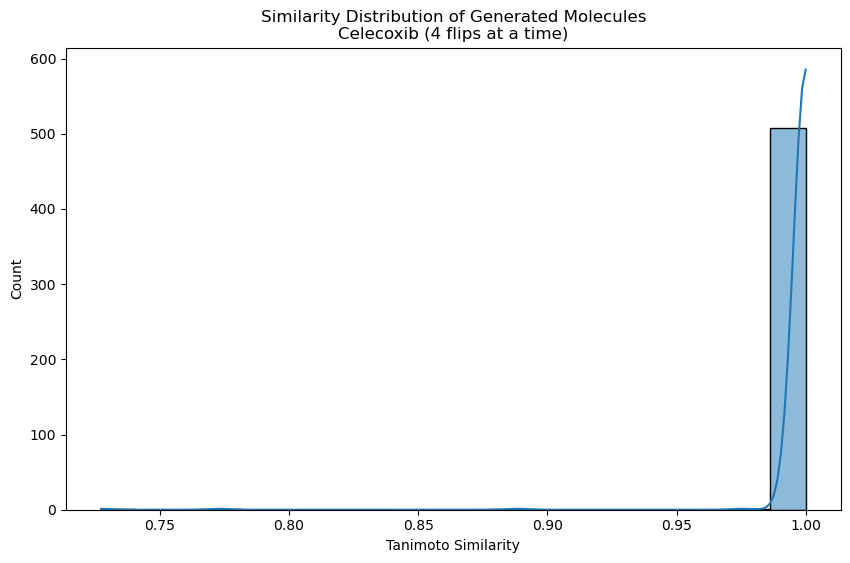

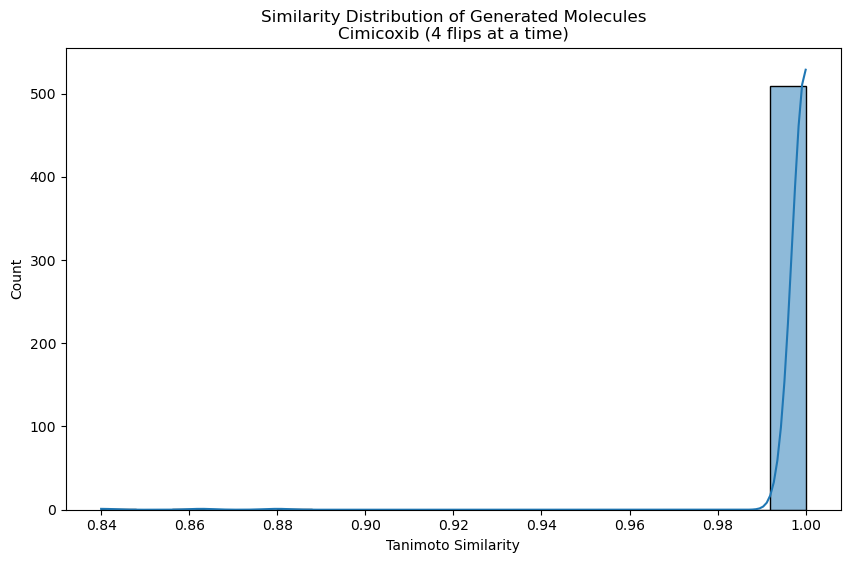

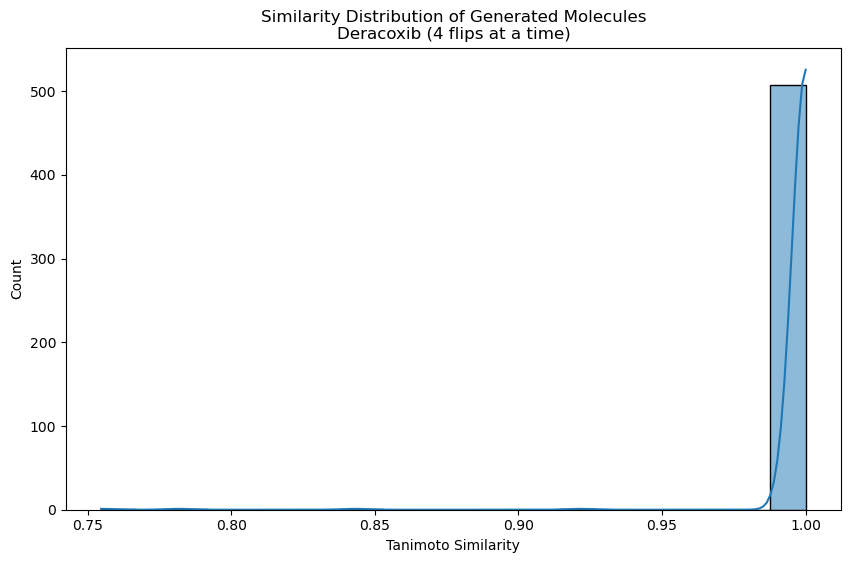

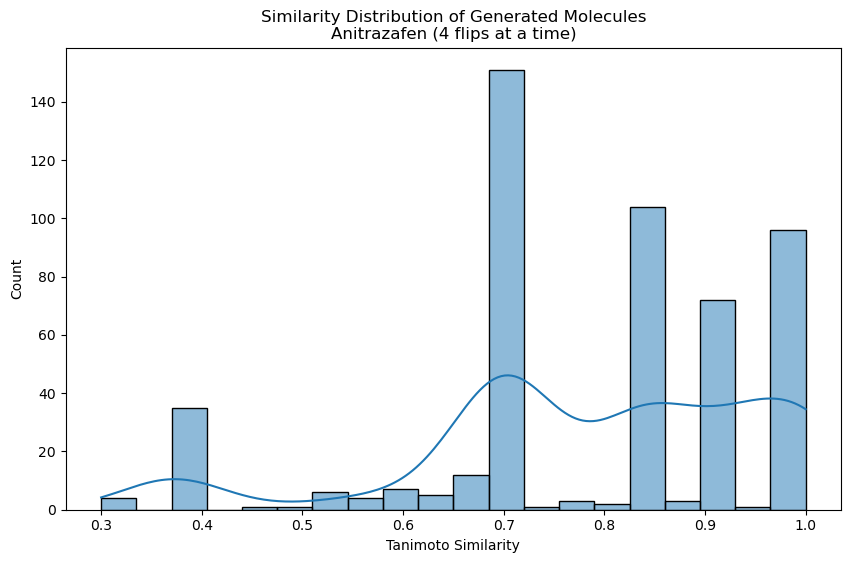

In [129]:
plot_similarity_distribution(parecoxib_df_4, 'Parecoxib', 4)
plot_similarity_distribution(celecoxib_df_4, 'Celecoxib', 4)
plot_similarity_distribution(cimicoxib_df_4, 'Cimicoxib', 4)
plot_similarity_distribution(deracoxib_df_4, 'Deracoxib', 4)
plot_similarity_distribution(anitrazafen_df_4, 'Anitrazafen', 4)

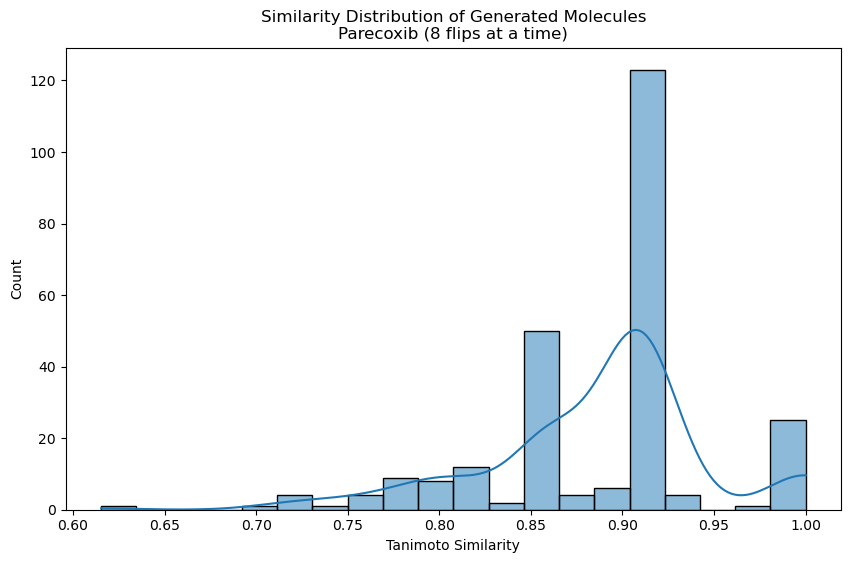

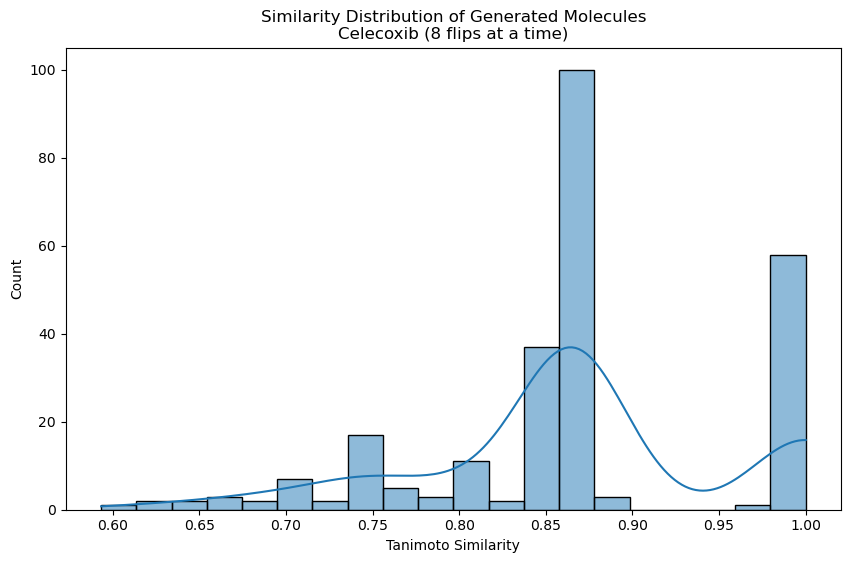

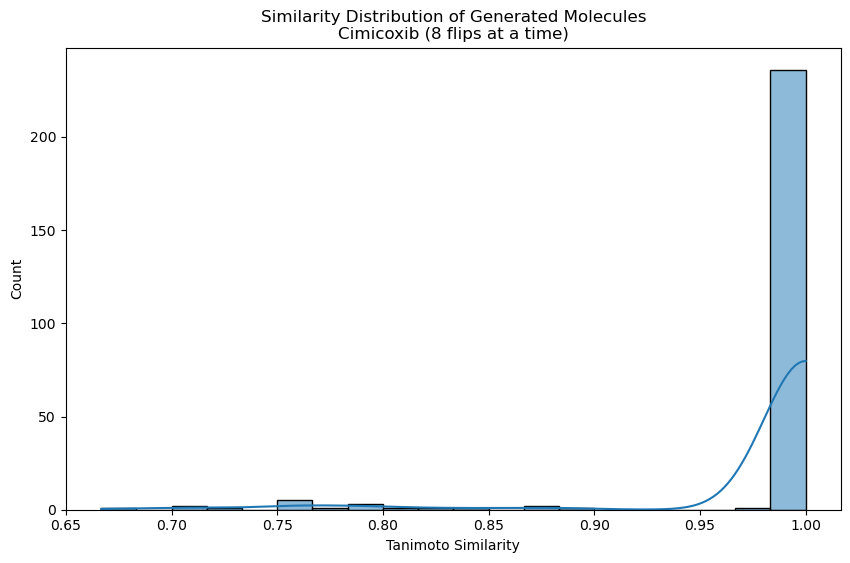

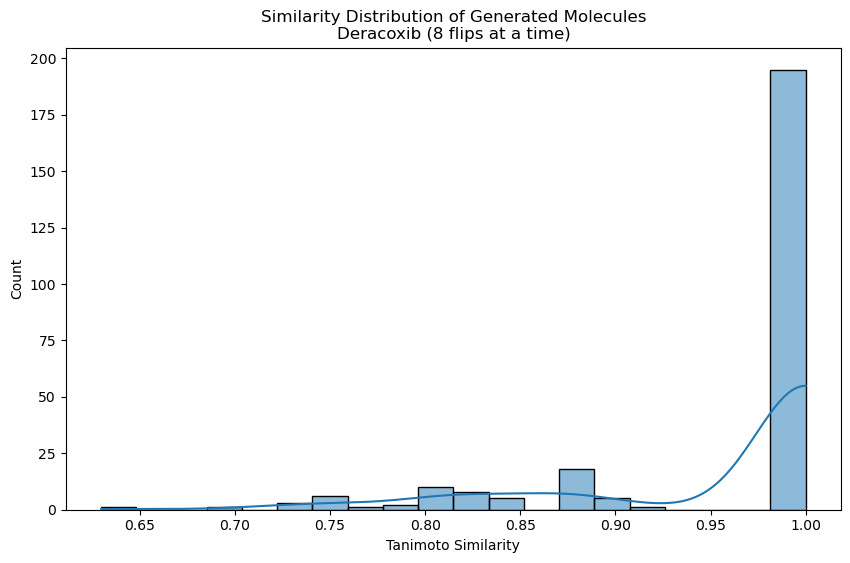

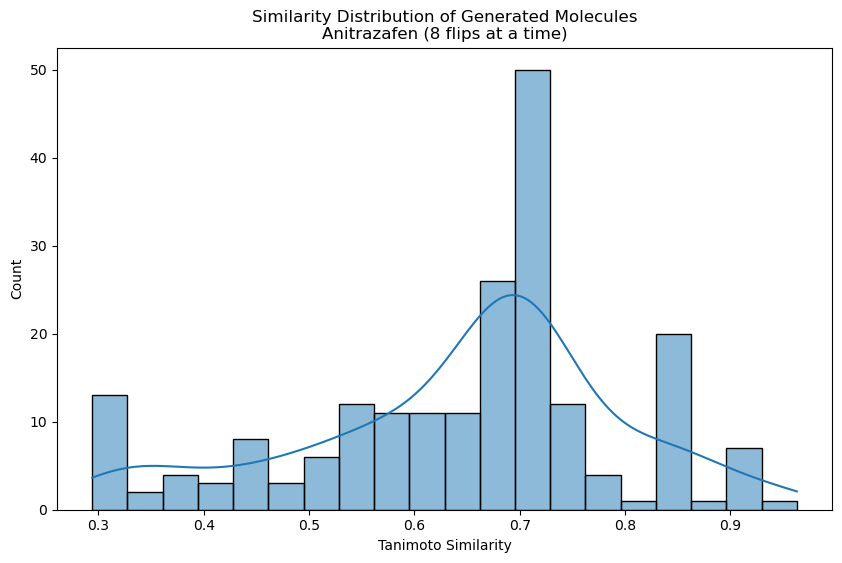

In [130]:
plot_similarity_distribution(parecoxib_df_8, 'Parecoxib', 8)
plot_similarity_distribution(celecoxib_df_8, 'Celecoxib', 8)
plot_similarity_distribution(cimicoxib_df_8, 'Cimicoxib', 8)
plot_similarity_distribution(deracoxib_df_8, 'Deracoxib', 8)
plot_similarity_distribution(anitrazafen_df_8, 'Anitrazafen', 8)

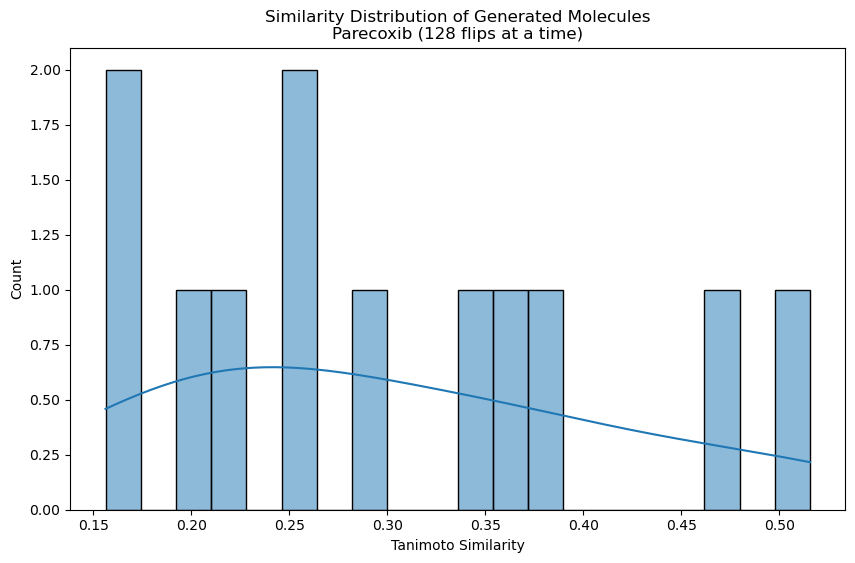

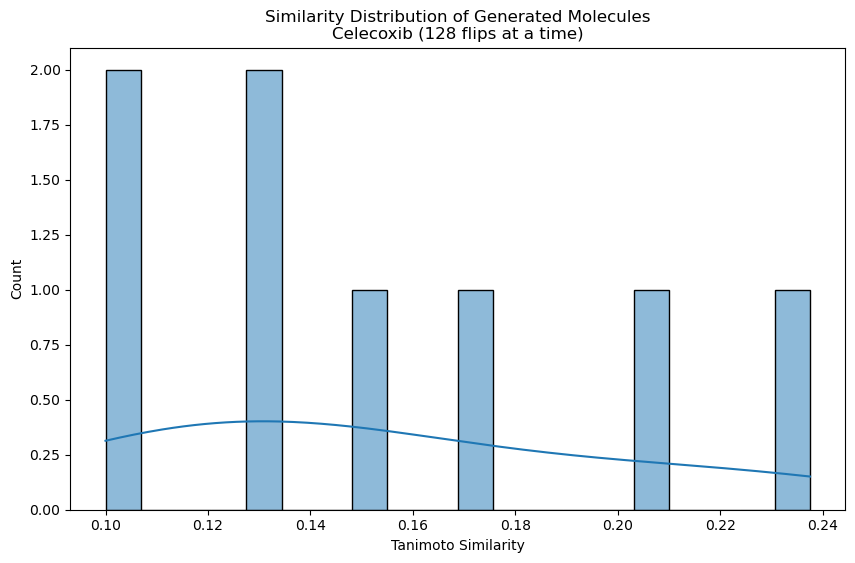

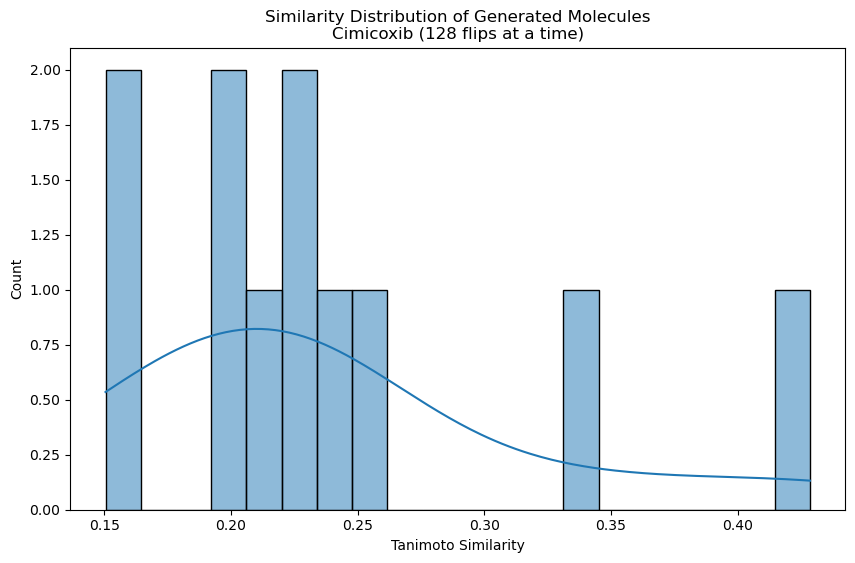

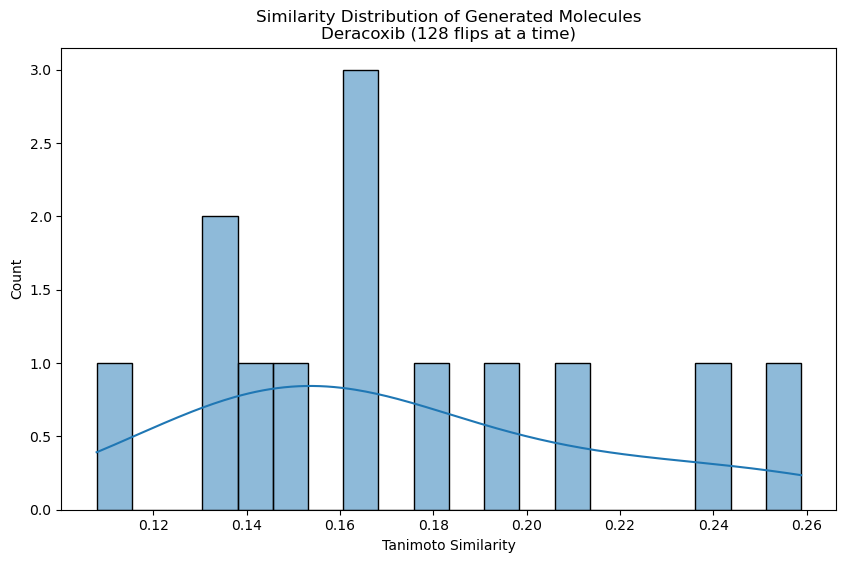

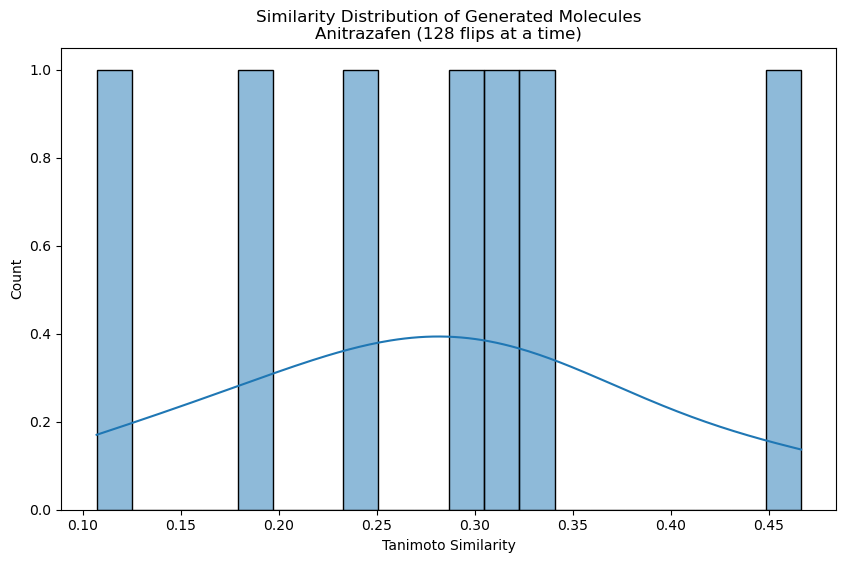

In [131]:
plot_similarity_distribution(parecoxib_df_128, 'Parecoxib', 128)
plot_similarity_distribution(celecoxib_df_128, 'Celecoxib', 128)
plot_similarity_distribution(cimicoxib_df_128, 'Cimicoxib', 128)
plot_similarity_distribution(deracoxib_df_128, 'Deracoxib', 128)
plot_similarity_distribution(anitrazafen_df_128, 'Anitrazafen', 128)

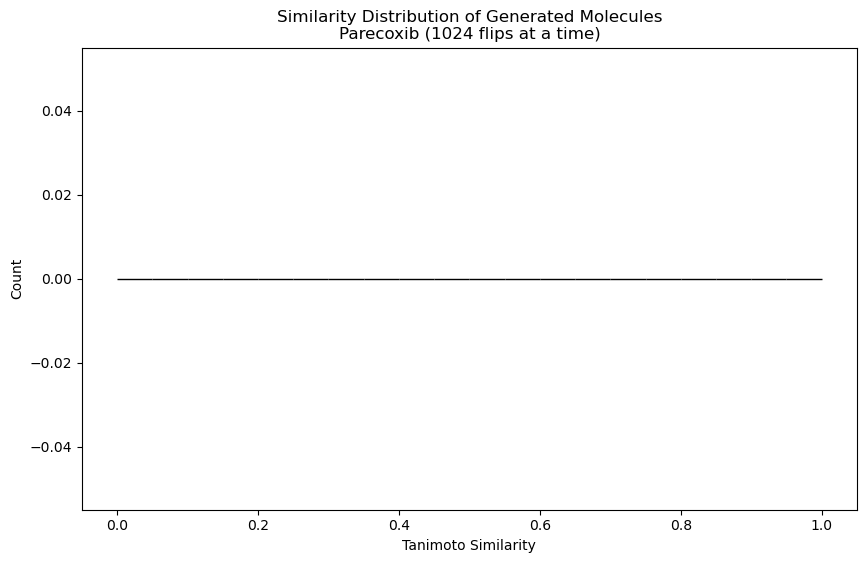

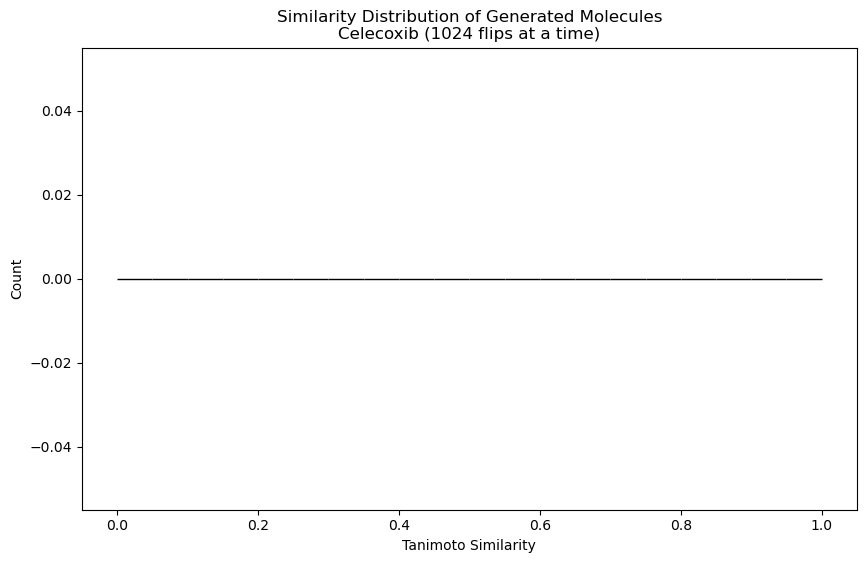

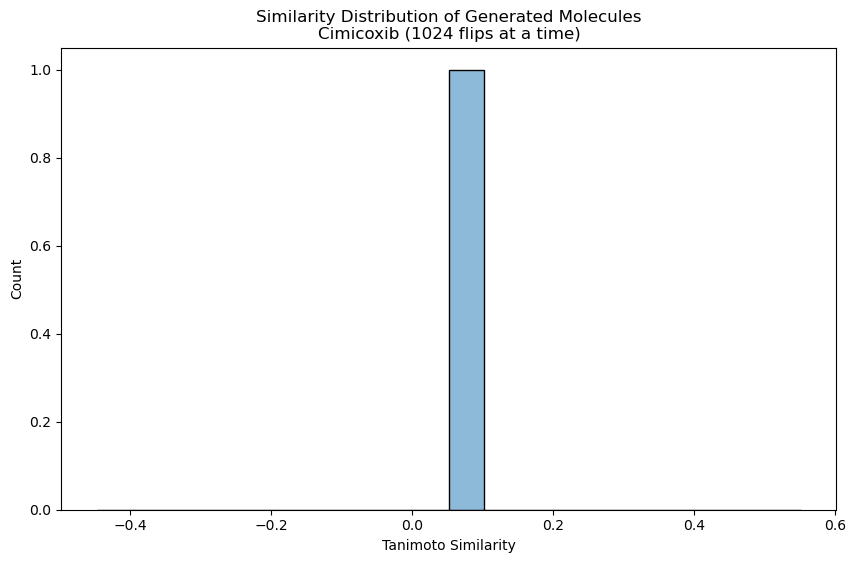

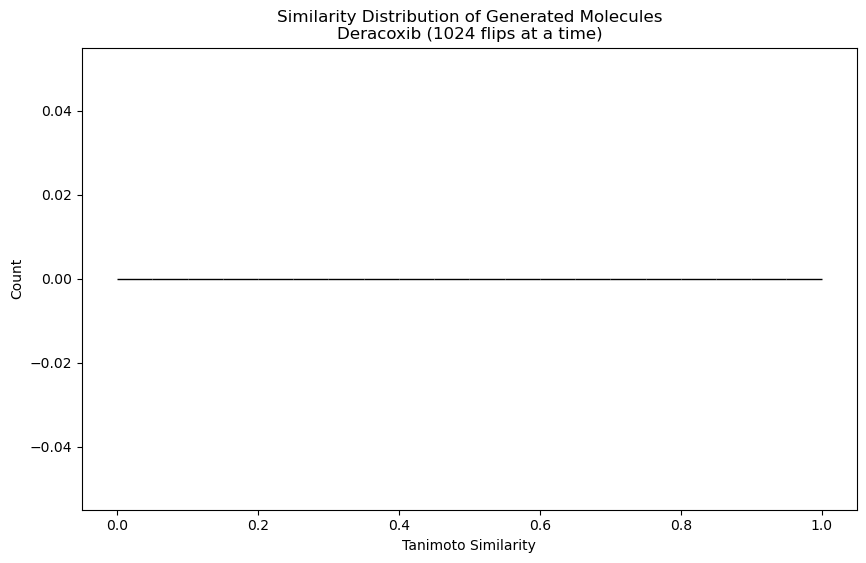

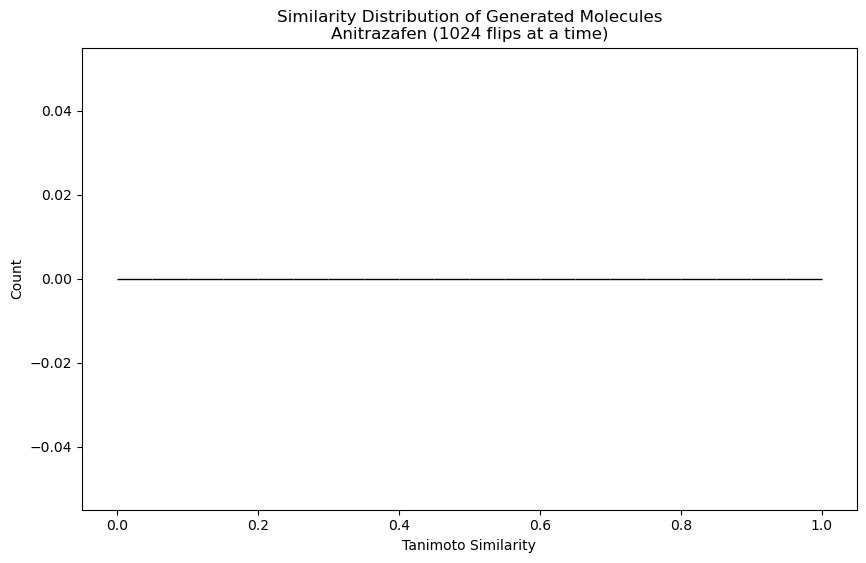

In [132]:
plot_similarity_distribution(parecoxib_df_1024, 'Parecoxib', 1024)
plot_similarity_distribution(celecoxib_df_1024, 'Celecoxib', 1024)
plot_similarity_distribution(cimicoxib_df_1024, 'Cimicoxib', 1024)
plot_similarity_distribution(deracoxib_df_1024, 'Deracoxib', 1024)
plot_similarity_distribution(anitrazafen_df_1024, 'Anitrazafen', 1024)

### Compare canonical SMILES
***

In [133]:
def compare_canonical_smiles(smiles1, smiles2):
    try:
        mol1 = Chem.MolFromSmiles(smiles1)
        mol2 = Chem.MolFromSmiles(smiles2)
        
        if mol1 is None:
            return {'match': False, 'reason': f"Invalid SMILES 1: {smiles1}"}
        if mol2 is None:
            return {'match': False, 'reason': f"Invalid SMILES 2: {smiles2}"}
        
        canonical_smiles1 = Chem.MolToSmiles(mol1, isomericSmiles=True, canonical=True)
        canonical_smiles2 = Chem.MolToSmiles(mol2, isomericSmiles=True, canonical=True)
        
        if canonical_smiles1 == canonical_smiles2:
            return {'match': True, 'canonical_smiles': canonical_smiles1}
        else:
            return {'match': False, 'reason': "Canonical SMILES do not match",
                    'canonical_smiles1': canonical_smiles1,
                    'canonical_smiles2': canonical_smiles2}
    except Exception as e:
        return {'match': False, 'reason': f"Error during comparison: {str(e)}"}

In [134]:
parecoxib_df_2['Canonical_Match'] = parecoxib_df_2.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
celecoxib_df_2['Canonical_Match'] = celecoxib_df_2.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
cimicoxib_df_2['Canonical_Match'] = cimicoxib_df_2.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
deracoxib_df_2['Canonical_Match'] = deracoxib_df_2.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
anitrazafen_df_2['Canonical_Match'] = anitrazafen_df_2.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)

parecoxib_df_4['Canonical_Match'] = parecoxib_df_4.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
celecoxib_df_4['Canonical_Match'] = celecoxib_df_4.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
cimicoxib_df_4['Canonical_Match'] = cimicoxib_df_4.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
deracoxib_df_4['Canonical_Match'] = deracoxib_df_4.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
anitrazafen_df_4['Canonical_Match'] = anitrazafen_df_4.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)

parecoxib_df_8['Canonical_Match'] = parecoxib_df_8.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
celecoxib_df_8['Canonical_Match'] = celecoxib_df_8.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
cimicoxib_df_8['Canonical_Match'] = cimicoxib_df_8.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
deracoxib_df_8['Canonical_Match'] = deracoxib_df_8.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
anitrazafen_df_8['Canonical_Match'] = anitrazafen_df_8.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)

parecoxib_df_128['Canonical_Match'] = parecoxib_df_128.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
celecoxib_df_128['Canonical_Match'] = celecoxib_df_128.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
cimicoxib_df_128['Canonical_Match'] = cimicoxib_df_128.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
deracoxib_df_128['Canonical_Match'] = deracoxib_df_128.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
anitrazafen_df_128['Canonical_Match'] = anitrazafen_df_128.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)

parecoxib_df_1024['Canonical_Match'] = parecoxib_df_1024.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
celecoxib_df_1024['Canonical_Match'] = celecoxib_df_1024.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
cimicoxib_df_1024['Canonical_Match'] = cimicoxib_df_1024.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
deracoxib_df_1024['Canonical_Match'] = deracoxib_df_1024.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
anitrazafen_df_1024['Canonical_Match'] = anitrazafen_df_1024.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)


[20:16:16] SMILES Parse Error: syntax error while parsing: Invalid
[20:16:16] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:16:16] SMILES Parse Error: syntax error while parsing: Invalid
[20:16:16] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:16:17] SMILES Parse Error: syntax error while parsing: Invalid
[20:16:17] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:16:17] SMILES Parse Error: syntax error while parsing: Invalid
[20:16:17] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:16:17] SMILES Parse Error: syntax error while parsing: Invalid
[20:16:17] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:16:17] SMILES Parse Error: syntax error while parsing: Invalid
[20:16:17] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:16:17] SMILES Parse Error: syntax error while parsing: Invalid
[20:16:17] SMILES Parse Err

In [135]:
canonical_matches_parecoxib_2 = parecoxib_df_2['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_celecoxib_2 = celecoxib_df_2['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_cimicoxib_2 = cimicoxib_df_2['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_deracoxib_2 = deracoxib_df_2['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_anitrazafen_2 = anitrazafen_df_2['Canonical_Match'].apply(lambda x: x['match']).sum()

canonical_matches_parecoxib_4 = parecoxib_df_4['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_celecoxib_4 = celecoxib_df_4['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_cimicoxib_4 = cimicoxib_df_4['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_deracoxib_4 = deracoxib_df_4['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_anitrazafen_4 = anitrazafen_df_4['Canonical_Match'].apply(lambda x: x['match']).sum()

canonical_matches_parecoxib_8 = parecoxib_df_8['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_celecoxib_8 = celecoxib_df_8['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_cimicoxib_8 = cimicoxib_df_8['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_deracoxib_8 = deracoxib_df_8['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_anitrazafen_8 = anitrazafen_df_8['Canonical_Match'].apply(lambda x: x['match']).sum()

canonical_matches_parecoxib_128 = parecoxib_df_128['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_celecoxib_128 = celecoxib_df_128['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_cimicoxib_128 = cimicoxib_df_128['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_deracoxib_128 = deracoxib_df_128['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_anitrazafen_128 = anitrazafen_df_128['Canonical_Match'].apply(lambda x: x['match']).sum()

canonical_matches_parecoxib_1024 = parecoxib_df_1024['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_celecoxib_1024 = celecoxib_df_1024['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_cimicoxib_1024 = cimicoxib_df_1024['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_deracoxib_1024 = deracoxib_df_1024['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_anitrazafen_1024 = anitrazafen_df_1024['Canonical_Match'].apply(lambda x: x['match']).sum()

print("**** Parecoxib ****")
print(f"Canonical SMILES Match Accuracy 2 random flips: {canonical_matches_parecoxib_2 / len(parecoxib_df_2):.2%}")
print(f"Canonical SMILES Match Accuracy 4 random flips: {canonical_matches_parecoxib_4 / len(parecoxib_df_4):.2%}")
print(f"Canonical SMILES Match Accuracy 8 random flips: {canonical_matches_parecoxib_8 / len(parecoxib_df_8):.2%}")
print(f"Canonical SMILES Match Accuracy 128 random flips: {canonical_matches_parecoxib_128 / len(parecoxib_df_128):.2%}")
print(f"Canonical SMILES Match Accuracy 1024 random flips: {canonical_matches_parecoxib_1024 / len(parecoxib_df_1024):.2%}")

print("**** Celecoxib ****")
print(f"Canonical SMILES Match Accuracy 2 random flips: {canonical_matches_celecoxib_2 / len(celecoxib_df_2):.2%}")
print(f"Canonical SMILES Match Accuracy 4 random flips: {canonical_matches_celecoxib_4 / len(celecoxib_df_4):.2%}")
print(f"Canonical SMILES Match Accuracy 8 random flips: {canonical_matches_celecoxib_8 / len(celecoxib_df_8):.2%}")
print(f"Canonical SMILES Match Accuracy 128 random flips: {canonical_matches_celecoxib_128 / len(celecoxib_df_128):.2%}")
print(f"Canonical SMILES Match Accuracy 1024 random flips: {canonical_matches_celecoxib_1024 / len(celecoxib_df_1024):.2%}")

print("**** Cimicoxib ****")
print(f"Canonical SMILES Match Accuracy 2 random flips: {canonical_matches_cimicoxib_2 / len(cimicoxib_df_2):.2%}")
print(f"Canonical SMILES Match Accuracy 4 random flips: {canonical_matches_cimicoxib_4 / len(cimicoxib_df_4):.2%}")
print(f"Canonical SMILES Match Accuracy 8 random flips: {canonical_matches_cimicoxib_8 / len(cimicoxib_df_8):.2%}")
print(f"Canonical SMILES Match Accuracy 128 random flips: {canonical_matches_cimicoxib_128 / len(cimicoxib_df_128):.2%}")
print(f"Canonical SMILES Match Accuracy 1024 random flips: {canonical_matches_cimicoxib_1024 / len(cimicoxib_df_1024):.2%}")

print("**** Deracoxib ****")
print(f"Canonical SMILES Match Accuracy 2 random flips: {canonical_matches_deracoxib_2 / len(deracoxib_df_2):.2%}")
print(f"Canonical SMILES Match Accuracy 4 random flips: {canonical_matches_deracoxib_4 / len(deracoxib_df_4):.2%}")
print(f"Canonical SMILES Match Accuracy 8 random flips: {canonical_matches_deracoxib_8 / len(deracoxib_df_8):.2%}")
print(f"Canonical SMILES Match Accuracy 128 random flips: {canonical_matches_deracoxib_128 / len(deracoxib_df_128):.2%}")
print(f"Canonical SMILES Match Accuracy 1024 random flips: {canonical_matches_deracoxib_1024 / len(deracoxib_df_1024):.2%}")

print("**** Anitrazafen ****")
print(f"Canonical SMILES Match Accuracy 2 random flips: {canonical_matches_anitrazafen_2 / len(anitrazafen_df_2):.2%}")
print(f"Canonical SMILES Match Accuracy 4 random flips: {canonical_matches_anitrazafen_4 / len(anitrazafen_df_4):.2%}")
print(f"Canonical SMILES Match Accuracy 8 random flips: {canonical_matches_anitrazafen_8 / len(anitrazafen_df_8):.2%}")
print(f"Canonical SMILES Match Accuracy 128 random flips: {canonical_matches_anitrazafen_128 / len(anitrazafen_df_128):.2%}")
print(f"Canonical SMILES Match Accuracy 1024 random flips: {canonical_matches_anitrazafen_1024 / len(anitrazafen_df_1024):.2%}")


**** Parecoxib ****
Canonical SMILES Match Accuracy 2 random flips: 98.73%
Canonical SMILES Match Accuracy 4 random flips: 95.70%
Canonical SMILES Match Accuracy 8 random flips: 3.91%
Canonical SMILES Match Accuracy 128 random flips: 0.00%
Canonical SMILES Match Accuracy 1024 random flips: 0.00%
**** Celecoxib ****
Canonical SMILES Match Accuracy 2 random flips: 99.80%
Canonical SMILES Match Accuracy 4 random flips: 99.22%
Canonical SMILES Match Accuracy 8 random flips: 17.19%
Canonical SMILES Match Accuracy 128 random flips: 0.00%
Canonical SMILES Match Accuracy 1024 random flips: 0.00%
**** Cimicoxib ****
Canonical SMILES Match Accuracy 2 random flips: 99.80%
Canonical SMILES Match Accuracy 4 random flips: 99.41%
Canonical SMILES Match Accuracy 8 random flips: 92.19%
Canonical SMILES Match Accuracy 128 random flips: 0.00%
Canonical SMILES Match Accuracy 1024 random flips: 0.00%
**** Deracoxib ****
Canonical SMILES Match Accuracy 2 random flips: 99.80%
Canonical SMILES Match Accuracy 

### Compare raw SMILES
***

In [136]:
raw_smiles_matches_parecoxib_2 = parecoxib_df_2.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_parecoxib_4 = parecoxib_df_4.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_parecoxib_8 = parecoxib_df_8.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_parecoxib_128 = parecoxib_df_128.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_parecoxib_1024 = parecoxib_df_1024.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
print("**** Parecoxib ****")
print(f"Raw SMILES Match Accuracy 2 random flips: {raw_smiles_matches_parecoxib_2.mean():.2%}")
print(f"Raw SMILES Match Accuracy 4 random flips: {raw_smiles_matches_parecoxib_4.mean():.2%}")
print(f"Raw SMILES Match Accuracy 8 random flips: {raw_smiles_matches_parecoxib_8.mean():.2%}")
print(f"Raw SMILES Match Accuracy 128 random flips: {raw_smiles_matches_parecoxib_128.mean():.2%}")
print(f"Raw SMILES Match Accuracy 1024 random flips: {raw_smiles_matches_parecoxib_1024.mean():.2%}")


raw_smiles_matches_celecoxib_2 = celecoxib_df_2.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_celecoxib_4 = celecoxib_df_4.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_celecoxib_8 = celecoxib_df_8.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_celecoxib_128 = celecoxib_df_128.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_celecoxib_1024 = celecoxib_df_1024.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
print("**** Celecoxib ****")
print(f"Raw SMILES Match Accuracy 2 random flips: {raw_smiles_matches_celecoxib_2.mean():.2%}")
print(f"Raw SMILES Match Accuracy 4 random flips: {raw_smiles_matches_celecoxib_4.mean():.2%}")
print(f"Raw SMILES Match Accuracy 8 random flips: {raw_smiles_matches_celecoxib_8.mean():.2%}")
print(f"Raw SMILES Match Accuracy 128 random flips: {raw_smiles_matches_celecoxib_128.mean():.2%}")
print(f"Raw SMILES Match Accuracy 1024 random flips: {raw_smiles_matches_celecoxib_1024.mean():.2%}")

raw_smiles_matches_cimicoxib_2 = cimicoxib_df_2.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_cimicoxib_4 = cimicoxib_df_4.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_cimicoxib_8 = cimicoxib_df_8.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_cimicoxib_128 = cimicoxib_df_128.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_cimicoxib_1024 = cimicoxib_df_1024.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
print("**** Cimicoxib ****")
print(f"Raw SMILES Match Accuracy 2 random flips: {raw_smiles_matches_cimicoxib_2.mean():.2%}")
print(f"Raw SMILES Match Accuracy 4 random flips: {raw_smiles_matches_cimicoxib_4.mean():.2%}")
print(f"Raw SMILES Match Accuracy 8 random flips: {raw_smiles_matches_cimicoxib_8.mean():.2%}")
print(f"Raw SMILES Match Accuracy 128 random flips: {raw_smiles_matches_cimicoxib_128.mean():.2%}")
print(f"Raw SMILES Match Accuracy 1024 random flips: {raw_smiles_matches_cimicoxib_1024.mean():.2%}")

raw_smiles_matches_deracoxib_2 = deracoxib_df_2.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_deracoxib_4 = deracoxib_df_4.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_deracoxib_8 = deracoxib_df_8.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_deracoxib_128 = deracoxib_df_128.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_deracoxib_1024 = deracoxib_df_1024.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
print("**** Deracoxib ****")
print(f"Raw SMILES Match Accuracy 2 random flips: {raw_smiles_matches_deracoxib_2.mean():.2%}")
print(f"Raw SMILES Match Accuracy 4 random flips: {raw_smiles_matches_deracoxib_4.mean():.2%}")
print(f"Raw SMILES Match Accuracy 8 random flips: {raw_smiles_matches_deracoxib_8.mean():.2%}")
print(f"Raw SMILES Match Accuracy 128 random flips: {raw_smiles_matches_deracoxib_128.mean():.2%}")
print(f"Raw SMILES Match Accuracy 1024 random flips: {raw_smiles_matches_deracoxib_1024.mean():.2%}")

raw_smiles_matches_anitrazafen_2 = anitrazafen_df_2.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_anitrazafen_4 = anitrazafen_df_4.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_anitrazafen_8 = anitrazafen_df_8.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_anitrazafen_128 = anitrazafen_df_128.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
raw_smiles_matches_anitrazafen_1024 = anitrazafen_df_1024.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
print("**** Anitrazafen ****")
print(f"Raw SMILES Match Accuracy 2 random flips: {raw_smiles_matches_anitrazafen_2.mean():.2%}")
print(f"Raw SMILES Match Accuracy 4 random flips: {raw_smiles_matches_anitrazafen_4.mean():.2%}")
print(f"Raw SMILES Match Accuracy 8 random flips: {raw_smiles_matches_anitrazafen_8.mean():.2%}")
print(f"Raw SMILES Match Accuracy 128 random flips: {raw_smiles_matches_anitrazafen_128.mean():.2%}")
print(f"Raw SMILES Match Accuracy 1024 random flips: {raw_smiles_matches_anitrazafen_1024.mean():.2%}")



**** Parecoxib ****
Raw SMILES Match Accuracy 2 random flips: 0.00%
Raw SMILES Match Accuracy 4 random flips: 0.00%
Raw SMILES Match Accuracy 8 random flips: 0.00%
Raw SMILES Match Accuracy 128 random flips: 0.00%
Raw SMILES Match Accuracy 1024 random flips: 0.00%
**** Celecoxib ****
Raw SMILES Match Accuracy 2 random flips: 0.00%
Raw SMILES Match Accuracy 4 random flips: 0.00%
Raw SMILES Match Accuracy 8 random flips: 0.00%
Raw SMILES Match Accuracy 128 random flips: 0.00%
Raw SMILES Match Accuracy 1024 random flips: 0.00%
**** Cimicoxib ****
Raw SMILES Match Accuracy 2 random flips: 0.00%
Raw SMILES Match Accuracy 4 random flips: 0.00%
Raw SMILES Match Accuracy 8 random flips: 0.00%
Raw SMILES Match Accuracy 128 random flips: 0.00%
Raw SMILES Match Accuracy 1024 random flips: 0.00%
**** Deracoxib ****
Raw SMILES Match Accuracy 2 random flips: 0.00%
Raw SMILES Match Accuracy 4 random flips: 0.00%
Raw SMILES Match Accuracy 8 random flips: 0.00%
Raw SMILES Match Accuracy 128 random flip

### Plot generated molecules
***

In [137]:
def mol_to_image(mol):
    if isinstance(mol, str):
        mol = Chem.MolFromSmiles(mol)
    if mol is None:
        return None
    img = Draw.MolToImage(mol)
    buffered = io.BytesIO()
    img.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode()

def plot_all_molecules(df, n_flips):
    molecule_name = df.iloc[0]['title'].lower()
    
    if n_flips >= 128:
        # Original behavior for 10 and 100 flips
        n_rows = len(df) + 1  # +1 for the original molecule
        fig, axes = plt.subplots(n_rows, 1, figsize=(10, 5*n_rows))
        
        # Plot original molecule
        original_mol = Chem.MolFromSmiles(df.iloc[0]['SMILES'])
        img = Draw.MolToImage(original_mol)
        axes[0].imshow(img)
        axes[0].set_title(f"Original Molecule: {df.iloc[0]['title']}")
        axes[0].axis('off')
        
        # Plot generated molecules
        for i, (_, row) in enumerate(df.iterrows(), start=1):
            img = mol_to_image(row['Generated_SMILES'])
            if img:
                axes[i].imshow(Image.open(io.BytesIO(base64.b64decode(img))))
                axes[i].set_title(f"Generated Molecule {i}: Tanimoto = {row['Tanimoto']:.2f}")
            else:
                axes[i].text(0.5, 0.5, "Invalid SMILES", ha='center', va='center')
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.savefig(os.path.join(INPUT_DIR, f'{molecule_name}_{n_flips}_random_flips.png'))
        plt.close(fig)
    
    else:
        # New behavior for 1000 flips: create 10 images with 100 molecules each
        for part in range(10):
            start_idx = part * 100
            end_idx = min((part + 1) * 100, len(df))  # Ensure we don't go beyond DataFrame length
            
            fig, axes = plt.subplots(10, 10, figsize=(20, 20))
            fig.suptitle(f"{df.iloc[0]['title']} - Part {part+1} of 10", fontsize=16)
            
            # Plot original molecule in the first subplot of each image
            original_mol = Chem.MolFromSmiles(df.iloc[0]['SMILES'])
            img = Draw.MolToImage(original_mol)
            axes[0, 0].imshow(img)
            axes[0, 0].set_title("Original", fontsize=8)
            axes[0, 0].axis('off')
            
            # Plot generated molecules
            for i, (_, row) in enumerate(df.iloc[start_idx:end_idx].iterrows()):
                row_idx = (i + 1) // 10  # Add 1 to account for original molecule
                col_idx = (i + 1) % 10
                
                if row_idx < 10:  # Ensure we don't exceed the grid dimensions
                    img = mol_to_image(row['Generated_SMILES'])
                    if img:
                        axes[row_idx, col_idx].imshow(Image.open(io.BytesIO(base64.b64decode(img))))
                        axes[row_idx, col_idx].set_title(f"Tanimoto = {row['Tanimoto']:.2f}", fontsize=6)
                    else:
                        axes[row_idx, col_idx].text(0.5, 0.5, "Invalid SMILES", ha='center', va='center', fontsize=6)
                    axes[row_idx, col_idx].axis('off')
            
            # Clear any unused subplots
            for i in range(10):
                for j in range(10):
                    if not axes[i, j].has_data():
                        axes[i, j].axis('off')
            
            plt.tight_layout()
            plt.savefig(os.path.join(INPUT_DIR, f'{molecule_name}_{n_flips}_random_flips_part{part+1}.png'))
            plt.close(fig)

In [138]:
plot_all_molecules(parecoxib_df_2,2)
plot_all_molecules(celecoxib_df_2,2)
plot_all_molecules(cimicoxib_df_2,2)
plot_all_molecules(deracoxib_df_2,2)
plot_all_molecules(anitrazafen_df_2,2)

plot_all_molecules(parecoxib_df_4,4)
plot_all_molecules(celecoxib_df_4,4)
plot_all_molecules(cimicoxib_df_4,4)
plot_all_molecules(deracoxib_df_4,4)
plot_all_molecules(anitrazafen_df_4,4)

plot_all_molecules(parecoxib_df_8,8)
plot_all_molecules(celecoxib_df_8,8)
plot_all_molecules(cimicoxib_df_8,8)
plot_all_molecules(deracoxib_df_8,8)
plot_all_molecules(anitrazafen_df_8,8)

plot_all_molecules(parecoxib_df_128,128)
plot_all_molecules(celecoxib_df_128,128)
plot_all_molecules(cimicoxib_df_128,128)
plot_all_molecules(deracoxib_df_128,128)
plot_all_molecules(anitrazafen_df_128,128)

plot_all_molecules(parecoxib_df_1024,1024)
plot_all_molecules(celecoxib_df_1024,1024)
plot_all_molecules(cimicoxib_df_1024,1024)
plot_all_molecules(deracoxib_df_1024,1024)
plot_all_molecules(anitrazafen_df_1024,1024)


[20:17:50] SMILES Parse Error: syntax error while parsing: Invalid
[20:17:50] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:19:04] SMILES Parse Error: syntax error while parsing: Invalid
[20:19:04] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:19:13] SMILES Parse Error: syntax error while parsing: Invalid
[20:19:13] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:19:13] SMILES Parse Error: syntax error while parsing: Invalid
[20:19:13] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:19:24] SMILES Parse Error: syntax error while parsing: Invalid
[20:19:24] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:19:30] SMILES Parse Error: syntax error while parsing: Invalid
[20:19:30] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:06] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:06] SMILES Parse Err

### Plot the nearest neighbors
***

In [139]:
def generate_fingerprints(smiles_list):
    """Generate Morgan fingerprints for a list of SMILES strings."""
    mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
    morgan_generator = GetMorganGenerator(radius=2, fpSize=2048)
    fps = [morgan_generator.GetFingerprint(mol) for mol in mols if mol is not None]
    return fps

def calculate_similarity_matrix(fps):
    """Calculate Tanimoto similarity matrix for a list of fingerprints."""
    n = len(fps)
    similarity_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            similarity_matrix[i, j] = DataStructs.TanimotoSimilarity(fps[i], fps[j])
    return similarity_matrix

def plot_mds_similarity(df, title_column='title', smiles_column='SMILES', 
                       generated_smiles_column='Generated_SMILES', n_flips=10):
    """Plot MDS similarity for molecules in the dataframe with a color bar indicating similarity to the original."""
    
    # Verify DataFrame is not empty
    if df.empty:
        print(f"Warning: Empty DataFrame for {title_column}")
        return
        
    try:
        # Extract SMILES (original + generated)
        original_smiles = df[smiles_column].iloc[0]
        generated_smiles = df[generated_smiles_column].tolist()
        
        # Verify we have SMILES to process
        if not generated_smiles:
            print(f"Warning: No generated SMILES found for {df[title_column].iloc[0]}")
            return
            
        all_smiles = [original_smiles] + generated_smiles

        # Generate fingerprints and calculate similarity matrix
        fps = generate_fingerprints(all_smiles)
        
        # Verify fingerprint generation was successful
        if not fps:
            print(f"Warning: Failed to generate fingerprints for {df[title_column].iloc[0]}")
            return
            
        similarity_matrix = calculate_similarity_matrix(fps)

        # Apply MDS
        mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
        coords = mds.fit_transform(1 - similarity_matrix)  # Convert similarity to distance

        # Calculate similarities to the original molecule
        similarities_to_original = similarity_matrix[0, 1:]

        # Create the plot
        plt.figure(figsize=(14, 10))
        
        # Plot generated SMILES with color indicating similarity to original
        scatter = plt.scatter(coords[1:, 0], coords[1:, 1], 
                            c=similarities_to_original, 
                            cmap='viridis', 
                            alpha=0.6, 
                            s=100)
        
        # Plot original SMILES in red
        plt.scatter(coords[0, 0], coords[0, 1], 
                   c='red', 
                   s=200, 
                   label='Original SMILES', 
                   edgecolors='black')

        # Add color bar
        cbar = plt.colorbar(scatter)
        cbar.set_label('Tanimoto Similarity to Original', rotation=270, labelpad=20)

        # Add labels safely
        for i in range(len(coords)):
            if i == 0:
                label = "Original"
            else:
                # Safely access FlippedBitPositions
                try:
                    flipped_bits = df['FlippedBitPositions'].iloc[i-1]
                    label = f"Bits: {flipped_bits}"
                except (KeyError, IndexError):
                    label = f"Generated {i}"
                    
            plt.annotate(label, 
                        (coords[i, 0], coords[i, 1]), 
                        xytext=(5, 5),
                        textcoords='offset points', 
                        fontsize=8)

        # Add title and labels
        plt.title(f"2D Projection of Molecular Similarity for {df[title_column].iloc[0]} ({n_flips} flips)")
        plt.xlabel("MDS Dimension 1")
        plt.ylabel("MDS Dimension 2")
        plt.legend()
        plt.tight_layout()
        
        # Save the figure
        filename = f'{df[title_column].iloc[0].lower()}_{n_flips}_flips_mds_similarity.png'
        plt.savefig(os.path.join(INPUT_DIR, filename))
        plt.close()
        
        return True
        
    except Exception as e:
        print(f"Error processing {df[title_column].iloc[0] if not df.empty else 'unknown'}: {str(e)}")
        plt.close()  # Ensure figure is closed even if error occurs
        return False

def process_and_plot(df, n_flips):
    """Process dataframe and generate plot with error handling."""
    try:
        success = plot_mds_similarity(df, n_flips=n_flips)
        if success:
            print(f"MDS plot saved for {df['title'].iloc[0]} with {n_flips} flips at a time.")
        else:
            print(f"Failed to create MDS plot for data with {n_flips} flips.")
    except Exception as e:
        print(f"Error in process_and_plot with {n_flips} flips: {str(e)}")

In [140]:
process_and_plot(parecoxib_df_2,2)
process_and_plot(celecoxib_df_2,2)
process_and_plot(cimicoxib_df_2,2)
process_and_plot(deracoxib_df_2,2)
process_and_plot(anitrazafen_df_2,2)

process_and_plot(parecoxib_df_4,4)
process_and_plot(celecoxib_df_4,4)
process_and_plot(cimicoxib_df_4,4)
process_and_plot(deracoxib_df_4,4)
process_and_plot(anitrazafen_df_4,4)

process_and_plot(parecoxib_df_8,8)
process_and_plot(celecoxib_df_8,8)
process_and_plot(cimicoxib_df_8,8)
process_and_plot(deracoxib_df_8,8)
process_and_plot(anitrazafen_df_8,8)

process_and_plot(parecoxib_df_128,128)
process_and_plot(celecoxib_df_128,128)
process_and_plot(cimicoxib_df_128,128)
process_and_plot(deracoxib_df_128,128)
process_and_plot(anitrazafen_df_128,128)

process_and_plot(parecoxib_df_1024,1024)
process_and_plot(celecoxib_df_1024,1024)
process_and_plot(cimicoxib_df_1024,1024)
process_and_plot(deracoxib_df_1024,1024)
process_and_plot(anitrazafen_df_1024,1024)

MDS plot saved for Parecoxib with 2 flips at a time.
MDS plot saved for Celecoxib with 2 flips at a time.
MDS plot saved for Cimicoxib with 2 flips at a time.


[20:20:30] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:30] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'


MDS plot saved for Deracoxib with 2 flips at a time.
MDS plot saved for Anitrazafen with 2 flips at a time.
MDS plot saved for Parecoxib with 4 flips at a time.
MDS plot saved for Celecoxib with 4 flips at a time.
MDS plot saved for Cimicoxib with 4 flips at a time.


[20:20:41] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:41] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'


MDS plot saved for Deracoxib with 4 flips at a time.


[20:20:43] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:43] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:43] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:43] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:43] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:43] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:43] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:43] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'


MDS plot saved for Anitrazafen with 4 flips at a time.


[20:20:46] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:46] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'


MDS plot saved for Parecoxib with 8 flips at a time.
MDS plot saved for Celecoxib with 8 flips at a time.
MDS plot saved for Cimicoxib with 8 flips at a time.
MDS plot saved for Deracoxib with 8 flips at a time.


[20:20:49] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:49] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:49] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:49] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:49] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:49] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:49] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:49] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:49] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:49] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:49] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:49] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:49] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:49] SMILES Parse Err

MDS plot saved for Anitrazafen with 8 flips at a time.


[20:20:50] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:50] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:50] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:50] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:50] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:50] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:50] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:50] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'


MDS plot saved for Parecoxib with 128 flips at a time.


[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Err

MDS plot saved for Celecoxib with 128 flips at a time.


[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'


MDS plot saved for Cimicoxib with 128 flips at a time.


[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'


MDS plot saved for Deracoxib with 128 flips at a time.


[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:51] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:51] SMILES Parse Err

MDS plot saved for Anitrazafen with 128 flips at a time.
MDS plot saved for Parecoxib with 1024 flips at a time.


[20:20:52] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:52] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:52] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:52] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
/home/javhittaxx/conda/envs/molforge/lib/python3.11/site-packages/sklearn/manifold/_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
/home/javhittaxx/conda/envs/molforge/lib/python3.11/site-packages/sklearn/manifold/_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
/home/javhittaxx/conda/envs/molforge/lib/python3.11/site-packages/sklearn/manifold/_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
/home/javhittaxx/conda/envs/molforge/lib/python3.11/site-packages/sklearn/manifold/_mds.py:161: RuntimeWarning: invalid value encountered

MDS plot saved for Celecoxib with 1024 flips at a time.
MDS plot saved for Cimicoxib with 1024 flips at a time.


[20:20:52] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:52] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:20:52] SMILES Parse Error: syntax error while parsing: Invalid
[20:20:52] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
/home/javhittaxx/conda/envs/molforge/lib/python3.11/site-packages/sklearn/manifold/_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
/home/javhittaxx/conda/envs/molforge/lib/python3.11/site-packages/sklearn/manifold/_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
/home/javhittaxx/conda/envs/molforge/lib/python3.11/site-packages/sklearn/manifold/_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
/home/javhittaxx/conda/envs/molforge/lib/python3.11/site-packages/sklearn/manifold/_mds.py:161: RuntimeWarning: invalid value encountered

MDS plot saved for Deracoxib with 1024 flips at a time.
MDS plot saved for Anitrazafen with 1024 flips at a time.


/home/javhittaxx/conda/envs/molforge/lib/python3.11/site-packages/sklearn/manifold/_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
/home/javhittaxx/conda/envs/molforge/lib/python3.11/site-packages/sklearn/manifold/_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
/home/javhittaxx/conda/envs/molforge/lib/python3.11/site-packages/sklearn/manifold/_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
/home/javhittaxx/conda/envs/molforge/lib/python3.11/site-packages/sklearn/manifold/_mds.py:165: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
/home/javhittaxx/conda/envs/molforge/lib/python3.11/site-packages/sklearn/manifold/_mds.py:161: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
/home/javhittaxx/conda/envs/molforge/lib/python3.

In [141]:
def plot_tsne_similarity(df, title_column='title', smiles_column='SMILES', 
                        generated_smiles_column='Generated_SMILES', n_flips=10):
    """Plot t-SNE similarity for molecules in the dataframe with a color bar indicating similarity to the original."""
    
    # Verify DataFrame is not empty
    if df.empty:
        print(f"Warning: Empty DataFrame for {title_column}")
        return False
        
    try:
        # Extract SMILES (original + generated)
        original_smiles = df[smiles_column].iloc[0]
        generated_smiles = df[generated_smiles_column].tolist()
        
        # Verify we have SMILES to process
        if not generated_smiles:
            print(f"Warning: No generated SMILES found for {df[title_column].iloc[0]}")
            return False
            
        all_smiles = [original_smiles] + generated_smiles

        # Generate fingerprints and calculate similarity matrix
        fps = generate_fingerprints(all_smiles)
        
        # Verify fingerprint generation was successful
        if not fps:
            print(f"Warning: Failed to generate fingerprints for {df[title_column].iloc[0]}")
            return False
            
        similarity_matrix = calculate_similarity_matrix(fps)

        # Adjust perplexity based on number of samples
        n_samples = len(all_smiles)
        perplexity = min(30, max(5, n_samples - 1))  # Default is 30, minimum of 5
        
        # Apply t-SNE with error handling
        try:
            tsne = TSNE(n_components=2, 
                       metric='precomputed', 
                       random_state=42,
                       perplexity=perplexity, 
                       init='random', 
                       learning_rate='auto')
            coords = tsne.fit_transform(1 - similarity_matrix)  # Convert similarity to distance
        except ValueError as e:
            print(f"t-SNE error for {df[title_column].iloc[0]}: {str(e)}")
            return False

        # Calculate similarities to the original molecule
        similarities_to_original = similarity_matrix[0, 1:]

        # Create the plot
        plt.figure(figsize=(14, 10))
        
        # Plot generated SMILES with color indicating similarity to original
        scatter = plt.scatter(coords[1:, 0], coords[1:, 1], 
                            c=similarities_to_original, 
                            cmap='viridis', 
                            alpha=0.6, 
                            s=100)
        
        # Plot original SMILES in red
        plt.scatter(coords[0, 0], coords[0, 1], 
                   c='red', 
                   s=200, 
                   label='Original SMILES', 
                   edgecolors='black')

        # Add color bar
        cbar = plt.colorbar(scatter)
        cbar.set_label('Tanimoto Similarity to Original', rotation=270, labelpad=20)

        # Add labels safely
        for i in range(len(coords)):
            if i == 0:
                label = "Original"
            else:
                # Safely access FlippedBitPositions
                try:
                    flipped_bits = df['FlippedBitPositions'].iloc[i-1]
                    label = f"Bits: {flipped_bits}"
                except (KeyError, IndexError):
                    label = f"Generated {i}"
                    
            plt.annotate(label, 
                        (coords[i, 0], coords[i, 1]), 
                        xytext=(5, 5),
                        textcoords='offset points', 
                        fontsize=8)

        # Add title and labels
        plt.title(f"2D Projection of Molecular Similarity for {df[title_column].iloc[0]} ({n_flips} flips)")
        plt.xlabel("t-SNE Dimension 1")
        plt.ylabel("t-SNE Dimension 2")
        plt.legend()
        plt.tight_layout()
        
        # Save the figure
        filename = f'{df[title_column].iloc[0].lower()}_{n_flips}_flips_tsne_similarity.png'
        plt.savefig(os.path.join(INPUT_DIR, filename))
        plt.close()
        
        return True
        
    except Exception as e:
        print(f"Error processing {df[title_column].iloc[0] if not df.empty else 'unknown'}: {str(e)}")
        plt.close()  # Ensure figure is closed even if error occurs
        return False

def process_and_plot_tsne(df, n_flips):
    """Process dataframe and generate t-SNE plot with error handling."""
    try:
        success = plot_tsne_similarity(df, n_flips=n_flips)
        if success:
            print(f"t-SNE plot saved for {df['title'].iloc[0]} with {n_flips} flips at a time.")
        else:
            print(f"Failed to create t-SNE plot for data with {n_flips} flips.")
    except Exception as e:
        print(f"Error in process_and_plot_tsne with {n_flips} flips: {str(e)}")

In [142]:
process_and_plot_tsne(parecoxib_df_2, 2)
process_and_plot_tsne(celecoxib_df_2, 2)
process_and_plot_tsne(cimicoxib_df_2, 2)
process_and_plot_tsne(deracoxib_df_2, 2)
process_and_plot_tsne(anitrazafen_df_2, 2)

process_and_plot_tsne(parecoxib_df_4, 4)
process_and_plot_tsne(celecoxib_df_4, 4)
process_and_plot_tsne(cimicoxib_df_4, 4)
process_and_plot_tsne(deracoxib_df_4, 4)
process_and_plot_tsne(anitrazafen_df_4, 4)

process_and_plot_tsne(parecoxib_df_8, 8)
process_and_plot_tsne(celecoxib_df_8, 8)
process_and_plot_tsne(cimicoxib_df_8, 8)
process_and_plot_tsne(deracoxib_df_8, 8)
process_and_plot_tsne(anitrazafen_df_8, 8)

process_and_plot_tsne(parecoxib_df_128, 128)
process_and_plot_tsne(celecoxib_df_128, 128)
process_and_plot_tsne(cimicoxib_df_128, 128)
process_and_plot_tsne(deracoxib_df_128, 128)
process_and_plot_tsne(anitrazafen_df_128, 128)

process_and_plot_tsne(parecoxib_df_1024, 1024)
process_and_plot_tsne(celecoxib_df_1024, 1024)
process_and_plot_tsne(cimicoxib_df_1024, 1024)
process_and_plot_tsne(deracoxib_df_1024, 1024)
process_and_plot_tsne(anitrazafen_df_1024, 1024)


t-SNE plot saved for Parecoxib with 2 flips at a time.
t-SNE plot saved for Celecoxib with 2 flips at a time.
t-SNE plot saved for Cimicoxib with 2 flips at a time.


[20:21:04] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:04] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'


t-SNE plot saved for Deracoxib with 2 flips at a time.
t-SNE plot saved for Anitrazafen with 2 flips at a time.
t-SNE plot saved for Parecoxib with 4 flips at a time.
t-SNE plot saved for Celecoxib with 4 flips at a time.
t-SNE plot saved for Cimicoxib with 4 flips at a time.


[20:21:16] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:16] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'


t-SNE plot saved for Deracoxib with 4 flips at a time.


[20:21:18] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:18] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:21:18] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:18] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:21:18] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:18] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:21:18] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:18] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'


t-SNE plot saved for Anitrazafen with 4 flips at a time.


[20:21:20] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:20] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'


t-SNE plot saved for Parecoxib with 8 flips at a time.
t-SNE plot saved for Celecoxib with 8 flips at a time.
t-SNE plot saved for Cimicoxib with 8 flips at a time.
t-SNE plot saved for Deracoxib with 8 flips at a time.


[20:21:24] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:24] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:21:24] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:24] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:21:24] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:24] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:21:24] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:24] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:21:24] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:24] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:21:24] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:24] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:21:24] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:24] SMILES Parse Err

t-SNE plot saved for Anitrazafen with 8 flips at a time.
t-SNE error for Parecoxib: perplexity must be less than n_samples
Failed to create t-SNE plot for data with 128 flips.
t-SNE error for Celecoxib: perplexity must be less than n_samples
Failed to create t-SNE plot for data with 128 flips.
t-SNE error for Cimicoxib: perplexity must be less than n_samples
Failed to create t-SNE plot for data with 128 flips.
t-SNE error for Deracoxib: perplexity must be less than n_samples
Failed to create t-SNE plot for data with 128 flips.
t-SNE error for Anitrazafen: perplexity must be less than n_samples
Failed to create t-SNE plot for data with 128 flips.
t-SNE error for Parecoxib: perplexity must be less than n_samples
Failed to create t-SNE plot for data with 1024 flips.
t-SNE error for Celecoxib: perplexity must be less than n_samples
Failed to create t-SNE plot for data with 1024 flips.
t-SNE error for Cimicoxib: perplexity must be less than n_samples
Failed to create t-SNE plot for data wit

[20:21:25] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:25] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:21:25] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:25] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:21:25] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:25] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:21:25] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:25] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:21:25] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:25] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:21:25] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:25] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[20:21:25] SMILES Parse Error: syntax error while parsing: Invalid
[20:21:25] SMILES Parse Err